In [4]:
from qutip import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib.lines import Line2D
from cmap import Colormap
from matplotlib import gridspec

lipari = cm.lipari
imola = cm.imola
cerrado = Colormap('contrib:cerrado')

In [2]:
plt.rcParams.update({
    # LaTeX rendering and font configuration
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],  # mathpazo corresponds to Palatino font
    "font.size": 18,  # Base font size
    
    # Font sizes for specific elements
    "axes.titlesize": 30,        # Axis title   
    "axes.labelsize": 30,         # Axis labels
    "xtick.labelsize": 24,        # X-ticks
    "ytick.labelsize": 24,        # Y-ticks
    "legend.fontsize": 24,        # Legend
    "figure.titlesize": 24,       # Figure title
    
    # LaTeX preamble packages
    "text.latex.preamble": r"""
        \usepackage{amsmath}
        \usepackage{amsfonts}
        \usepackage{amssymb}
        \usepackage{lmodern}
        \usepackage{mathpazo}
    """
})

## Figure 2 plots


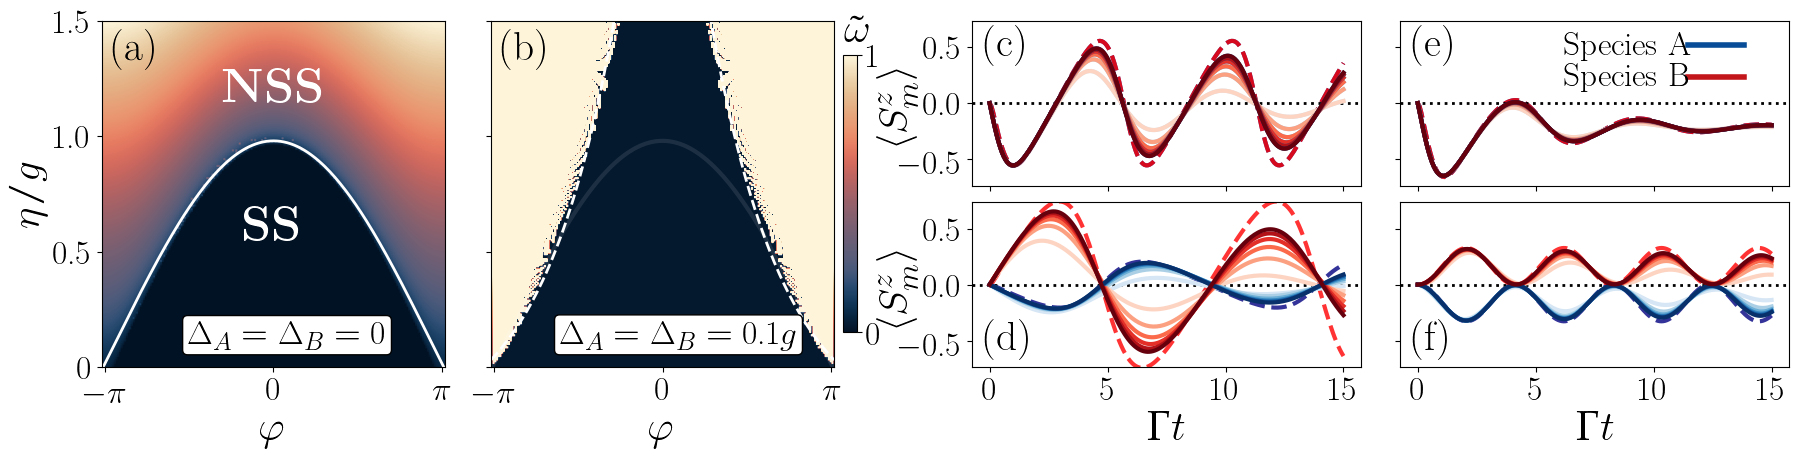

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

kappa = 1.0
g = 0.1*kappa
Gamma = 4*g**2/kappa
tim = np.linspace(0, 15/Gamma, 200)  # Fixed time grid


# Load the two “vars_sz1” files exactly as in Julia
data1 = np.loadtxt("../simul/fourier_sznodet.txt")   
data2 = np.loadtxt("../simul/fourier_szwdet.txt")


φ_vals = np.linspace(-np.pi, np.pi, len(data1)) 
η_vals = np.linspace(0.0*g, 1.5*g, len(data1.T))    


x = φ_vals / np.pi               
y = η_vals / g                   

data1 = data1.T
data2 = data2.T

# Color limits (matching Julia’s clims1 and clims2)
clims1 = (0.0, 1)
clims2 = (0.0, 1.0)

# xticks at φ/π = −1,0,1, labeled “–π, 0, π”
xtick_locs   = [-0.98, 0.0, 0.98]
xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

ytick_locs = [0.001, 0.5, 1.0, 1.5]
ytick_labels = [r"$0$", r"$0.5$", r"$1.0$", r"$1.5$"]


# Choose “lipari” colormap (replace with your actual custom cmap if needed)
# If you defined a custom Lipari colormap elsewhere, import or recreate it here.
# For demonstration I'll just pick “viridis”:
cmap = lipari

# --------------------------------------------
# (2) Load / define all data for panels (c)

phi_list    = [0, 0, 4/5 * np.pi, np.pi]
deltaA_list = [0, 0.01, 0, 0.01]

# Pre‐load the three sets of mean‐field data:
data1_mf1 = np.loadtxt("../finsize_data/mf_data1s1.txt")
data1_mf2 = np.loadtxt("../finsize_data/mf_data1s2.txt")

data2_mf1 = np.loadtxt("../finsize_data/mf_data2s1.txt")
data2_mf2 = np.loadtxt("../finsize_data/mf_data2s2.txt")

data3_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data3_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")

data4_mf1 = np.loadtxt("../finsize_data/mf_data4s1.txt")
data4_mf2 = np.loadtxt("../finsize_data/mf_data4s2.txt")

mf_data_list = [
    (data1_mf1, data1_mf2),
    (data4_mf1, data4_mf2),
    (data2_mf1, data2_mf2),
    (data3_mf1, data3_mf2),
]


tim = np.linspace(0, 15/Gamma, 200)  # adjust path/name as needed

fig = plt.figure(figsize=(22.5, 4.5))

# Main grid: 3 rows × 3 columns
gs = gridspec.GridSpec(
    nrows=3, ncols=3, figure=fig,
    width_ratios=[0.5, 0.5, 1],
    height_ratios=[0.8, 0.8, 1],
    wspace=0.1, hspace=0.03
)

# Panel (a): leftmost column, all rows
ax_a = fig.add_subplot(gs[:, 0])

# Panel (b): middle column, all rows
ax_b = fig.add_subplot(gs[:, 1])

# ---------------------------
# Panel (c) region: instead of
# splitting gs[0,2], gs[1,2], gs[2,2] into three
# rows, we create a 2×2 sub‐GridSpec that lives in gs[:, 2].
# That is, gs[:, 2] spans all three rows in the rightmost column,
# and we carve out a 2×2 inside it.

sub_gs_c = gridspec.GridSpecFromSubplotSpec(
    nrows=2, ncols=2,
    subplot_spec=gs[:, 2],
    hspace=0.1, wspace=0.1
)

# Now create four axes for the 2×2 grid:
ax_c1 = fig.add_subplot(sub_gs_c[0, 0])  # top‐left of the 2×2
ax_c2 = fig.add_subplot(sub_gs_c[0, 1])  # top‐right of the 2×2
ax_c3 = fig.add_subplot(sub_gs_c[1, 0])  # bottom‐left of the 2×2
ax_c4 = fig.add_subplot(sub_gs_c[1, 1])  # bottom‐right of the 2×2 (empty)

# --------------------------------------------
# (4) Plot Panel (a) exactly as before

im_a = ax_a.imshow(
    data1 * 1 / data1.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims1[0],
    vmax=clims1[1]
)

ax_a.set_ylabel(r"$\eta / g$")
ax_a.set_xlabel(r"$\varphi$")
ax_a.set_xticks(xtick_locs)
ax_a.set_xticklabels(xtick_labels)
ax_a.set_yticks(ytick_locs)
ax_a.set_yticklabels(ytick_labels)

fncx = (0.88 * np.cos(1.08 * x * np.pi / 2.0) + 0.1)
ax_a.plot(x, fncx, color="white", linewidth=2)

ax_a.set_ylim(0.001, 1.5)
ax_a.text(
    0.03, 0.98, "(a)",
    transform=ax_a.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)

ax_a.text(
    0.25, 0.05, r"$\mathrm{\Delta}_A=\mathrm{\Delta}_B=0$",
    transform=ax_a.transAxes,
    fontsize=24,
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)

ax_a.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35,
          ha="center", va="center", color="white")
ax_a.text(0.0, 1.2, r"$\mathbf{NSS}$", fontsize=35,
          ha="center", va="center", color="white")

# --------------------------------------------
# (5) Plot Panel (b) exactly as before

im_b = ax_b.imshow(
    data2 * 1 / data2.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims2[0],
    vmax=clims2[1]
)

ax_b.set_xlabel(r"$\varphi$")
ax_b.set_xticks(xtick_locs)
ax_b.set_xticklabels(xtick_labels)

ax_b.set_yticks(ytick_locs)
ax_b.set_yticklabels([])

a = 3.5
b = 4.5
c = -0.3
fncx2 = a * (np.exp(-b * np.abs(x * np.pi / 6))) + c

y_fncx = np.where(fncx > fncx2, fncx, np.nan)
y_fncx2 = np.where(fncx2 > fncx, fncx2, np.nan)

#ax_b.plot(x, fncx,  color="white", linewidth=2)
ax_b.plot(x, fncx2, color="white", linewidth=2, linestyle="--")

mask = fncx <= fncx2
ax_b.plot(x[mask], fncx[mask], color="white", alpha=0.1, linewidth=3)

ax_b.text(
    0.2, 0.05, r"$\mathrm{\Delta}_A=\mathrm{\Delta}_B=0.1g$",
    transform=ax_b.transAxes,
    fontsize=24,
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)

ax_b.set_ylim(0.001, 1.5)

ax_b.text(
    0.03, 0.98, "(b)",
    transform=ax_b.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)

# ax_b.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35,
#           ha="center", va="center", color="white")
# ax_b.text(0.69, 1.22, r"$\mathbf{NSS}$", fontsize=30,
#           ha="center", va="center", color="white")
# ax_b.text(-0.68, 1.22, r"$\mathbf{NSS}$", fontsize=30,
#           ha="center", va="center", color="white")

cbar = fig.colorbar(
    im_b,
    ax=[ax_a, ax_b],
    location="right",
    pad=0.01,
    shrink=0.8
)
title = cbar.ax.set_title(r"$\tilde{\omega}$", pad=10)
title.set_x(1.01)  
cbar.set_ticks([0.0, 1])
cbar.set_ticklabels([r"$0$", r"$1$"])

# --------------------------------------------
# (6) Plot Panels (c1), (c2), (c3) into the new 2×2 grid

# We still loop over our three data‐sets for c1/c2/c3.
axes_c_data = [ax_c1, ax_c2, ax_c3, ax_c4]
ymin, ymax = -0.735, 0.735
yticks    = np.arange(-0.5, 0.6, 0.5)

for ax_plot, φ, ΔA, (mf1, mf2) in zip(
        axes_c_data,
        phi_list,
        deltaA_list,
        mf_data_list
    ):
    data = np.load(
        f"../finsize_data/spin_dynamics_ϕ{φ}_Delta{ΔA}.npz",
        allow_pickle=True
    )
    N_values = data["N_values"]
    Jz_A     = data["Jz_A"]
    Jz_B     = data["Jz_B"]

    # Plot mean‐field (dashed)
    ax_plot.plot(tim, mf1, lw=3, color="navy", linestyle="--", alpha=0.8)
    ax_plot.plot(tim, mf2, lw=3, color="red",  linestyle="--", alpha=0.8)

    # Zero line
    ax_plot.axhline(0, color="black", lw=2, linestyle=":")

    # Finite‐N curves
    colorlistA = plt.get_cmap("Blues", 1 + len(N_values))
    colorlistB = plt.get_cmap("Reds",  1 + len(N_values))
    for n_idx in range(len(N_values)):
        ax_plot.plot(
            tim,
            Jz_A[n_idx] / N_values[n_idx],
            lw=3,
            color=colorlistA(1 + n_idx)
        )
        ax_plot.plot(
            tim,
            Jz_B[n_idx] / N_values[n_idx],
            lw=3,
            color=colorlistB(1 + n_idx)
        )

    # Only set y‐label for the *left‐column* of the 2×2 (i.e. ax_c1 and ax_c3)
    ax_plot.set_ylabel(r"$\langle S^z_m \rangle$", labelpad=-15)
    ax_plot.set_ylim(ymin, ymax)
    ax_plot.set_yticks(yticks)


ax_c3.set_xticks([0,5/Gamma, 10/Gamma, 15/Gamma], [0,5, 10, 15])
ax_c3.set_xlabel(r"$\Gamma t$")
ax_c4.set_xlabel(r"$\Gamma t$")
ax_c4.set_xticks([0,5/Gamma, 10/Gamma, 15/Gamma], [0,5, 10, 15])

ax_c1.set_xticks([0,5/Gamma, 10/Gamma, 15/Gamma])
ax_c2.set_xticks([0,5/Gamma, 10/Gamma, 15/Gamma])


for ax_top in [ax_c1, ax_c2]:
    ax_top.set_xticklabels([])


for ax_right in [ax_c2, ax_c4]:
    ax_right.set_yticklabels([])
    ax_right.set_ylabel("")  # ensures no y‐label box





x0, x1 = 0.83, 0.855
y1 = 0.825
y2 = 0.755
color1 = plt.get_cmap('Reds', 10)
color2 = plt.get_cmap('Blues',10)
# make two thick lines in figure‐space
l1 = Line2D([x0, x1], [y1, y1],
            color=color2(8), lw=4,
            transform=fig.transFigure,
            figure=fig)
l2 = Line2D([x0, x1], [y2, y2],
            color=color1(7),  lw=4,
            transform=fig.transFigure,
            figure=fig)

fig.add_artist(l1)
fig.add_artist(l2)

# then add text labels if you like

fig.text(x0 - 0.055, y1, "Species A", va='center',fontsize=24)
fig.text(x0 - 0.055, y2, 'Species B',  va='center',fontsize=24)


dx = 0.025


for ax in [ax_c1, ax_c2, ax_c3, ax_c4]:
    pos = ax.get_position()  # get [x0, y0, width, height]
    ax.set_position([
        pos.x0 - dx,  # new x0 (shift left)
        pos.y0,
        pos.width,
        pos.height
    ])


ax_c1.text(
    0.03, 0.98, "(c)",
    transform=ax_c1.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)
ax_c2.text(
    0.03, 0.98, "(e)",
    transform=ax_c2.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)
ax_c3.text(
    0.03, 0.3, "(d)",
    transform=ax_c3.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)
ax_c4.text(
    0.03, 0.3, "(f)",
    transform=ax_c4.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)



# plt.savefig("fig2_1.svg", bbox_inches="tight")
# plt.tight_layout()
plt.show()

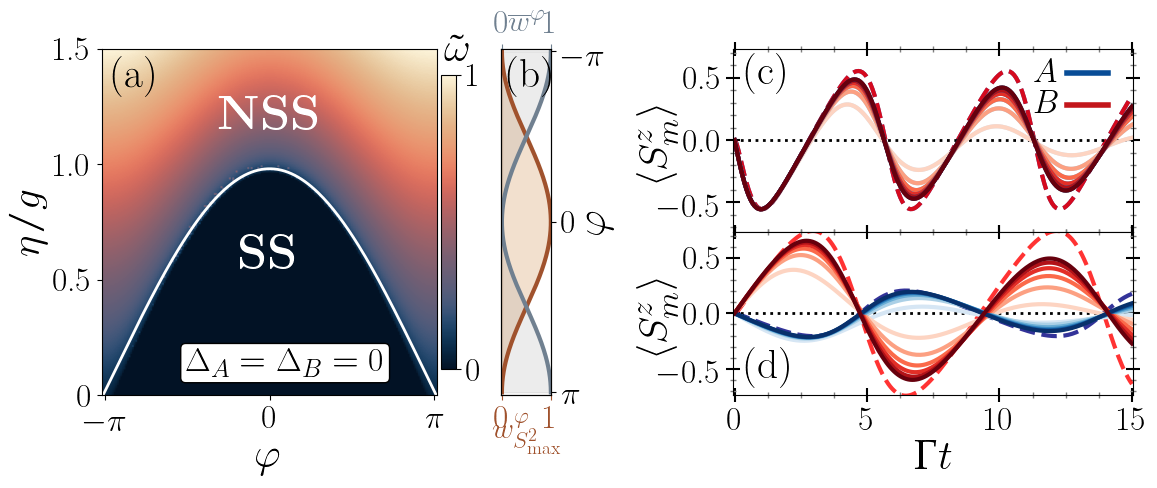

In [ ]:
kappa = 1.0
g = 0.1 * kappa
Gamma = 4 * g ** 2 / kappa
tim = np.linspace(0, 15 / Gamma, 200)  # Fixed time grid

# Load the two “vars_sz1” files exactly as in Julia
data1 = np.loadtxt("../simul/fourier_sznodet.txt")
data2 = np.loadtxt("../simul/fourier_szwdet.txt")

φ_vals = np.linspace(-np.pi, np.pi, len(data1))
η_vals = np.linspace(0.0 * g, 1.5 * g, len(data1.T))

x = φ_vals / np.pi
y = η_vals / g

data1 = data1.T
data2 = data2.T

# Color limits (matching Julia’s clims1 and clims2)
clims1 = (0.0, 1)
clims2 = (0.0, 1.0)

# xticks at φ/π = −1,0,1, labeled “–π, 0, π”
xtick_locs = [-0.98, 0.0, 0.98]
xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

ytick_locs = [0.001, 0.5, 1.0, 1.5]
ytick_labels = [r"$0$", r"$0.5$", r"$1.0$", r"$1.5$"]



# --------------------------------------------
# (2) Load / define all data for panels (c)
phi_list = [0, 0, 4 / 5 * np.pi, np.pi]
deltaA_list = [0, 0.01, 0, 0.01]

# Pre‐load the mean‐field data (kept as before).
data1_mf1 = np.loadtxt("../finsize_data/mf_data1s1.txt")
data1_mf2 = np.loadtxt("../finsize_data/mf_data1s2.txt")

data2_mf1 = np.loadtxt("../finsize_data/mf_data2s1.txt")
data2_mf2 = np.loadtxt("../finsize_data/mf_data2s2.txt")

data3_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data3_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")

data4_mf1 = np.loadtxt("../finsize_data/mf_data4s1.txt")
data4_mf2 = np.loadtxt("../finsize_data/mf_data4s2.txt")

mf_data_list = [
    (data1_mf1, data1_mf2),
    (data4_mf1, data4_mf2),
    (data2_mf1, data2_mf2),
    (data3_mf1, data3_mf2),
]

tim = np.linspace(0, 15 / Gamma, 200)

fig = plt.figure(figsize=(16.5, 4.5))

# Main grid: 3 rows × 3 columns (we'll keep structure but create custom b)
gs = gridspec.GridSpec(
    nrows=3,
    ncols=3,
    figure=fig,
    width_ratios=[1,1,1],
    height_ratios=[0.8, 0.8, 1],
    wspace=0.1,
    hspace=0.03,
)

# Panel (a): leftmost column, all rows
ax_a = fig.add_subplot(gs[:, 0])

# Right-most column becomes a 2x1 stacked (c) and (d)
sub_gs_c = gridspec.GridSpecFromSubplotSpec(
    nrows=2, ncols=1, subplot_spec=gs[:, 2], hspace=0.12, wspace=0.05
)
ax_c1 = fig.add_subplot(sub_gs_c[0, 0])  # (c) top
ax_c2 = fig.add_subplot(sub_gs_c[1, 0])  # (d) bottom (will use the original dataset 3)

# --------------------------------------------
# (4) Plot Panel (a) exactly as before

im_a = ax_a.imshow(
    data1 * 1 / data1.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=cmap,
    vmin=clims1[0],
    vmax=clims1[1],
)

ax_a.set_ylabel(r"$\eta / g$")
ax_a.set_xlabel(r"$\varphi$")
ax_a.set_xticks(xtick_locs)
ax_a.set_xticklabels(xtick_labels)
ax_a.set_yticks(ytick_locs)
ax_a.set_yticklabels(ytick_labels)

fncx = (0.88 * np.cos(1.08 * x * np.pi / 2.0) + 0.1)
ax_a.plot(x, fncx, color="white", linewidth=2)

ax_a.set_ylim(0.001, 1.5)
ax_a.text(
    0.03,
    0.98,
    "(a)",
    transform=ax_a.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left",
)

ax_a.text(
    0.25,
    0.05,
    r"$\mathrm{\Delta}_A=\mathrm{\Delta}_B=0$",
    transform=ax_a.transAxes,
    fontsize=24,
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15"),
)

ax_a.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35, ha="center", va="center", color="white")
ax_a.text(0.0, 1.2, r"$\mathbf{NSS}$", fontsize=35, ha="center", va="center", color="white")

# --------------------------------------------

pos_a = ax_a.get_position()  # [x0, y0, width, height]
b_width = 0.125 * pos_a.width
gap = 0.0  # small gap between (a) and (b)
b_x0 = pos_a.x0 + pos_a.width + gap
b_y0 = pos_a.y0
b_height = pos_a.height

ax_b = fig.add_axes([b_x0, b_y0, b_width, b_height])

line1, = ax_b.plot(np.cos(φ_vals/2)**2, φ_vals, lw=3, color='sienna')
line2, = ax_b.plot(np.sin(φ_vals/2)**2, φ_vals, lw=3, color='slategrey')
ax_b.fill_betweenx(φ_vals, 0, np.cos(φ_vals / 2)**2, color='peru', alpha=0.25)
ax_b.fill_betweenx(φ_vals, 0, np.sin(φ_vals/2)**2, color='grey', alpha=0.15)
ax_b.set_ylim(-np.pi-0.05, np.pi+0.05)
ax_b.set_xlim(-0.01,1.01)
ax_b.set_yticks([-np.pi, 0, np.pi], [r'$\pi$', r'0', r'$-\pi$'])
ax_b.set_ylabel(r"$\varphi$", labelpad=-20, rotation=90)
ax_b.yaxis.tick_right()
ax_b.yaxis.set_label_position("right")


ax_b.set_xlabel(
    r"$w^\varphi_{S^2_\text{max}}$",
    color='sienna',
    fontsize=22, labelpad=-15
)
ax_b.tick_params(axis='x', colors='sienna')

ax_top = ax_b.twiny()
ax_top.set_xlim(ax_b.get_xlim())    
ax_top.set_xlabel(
    r"$\overline{w}^\varphi$",
    color='slategrey',
    fontsize=22, labelpad=-15
)
ax_top.tick_params(axis='x', colors='slategrey')

ax_b.text(
    0.12, 0.98, "(b)",
    transform=ax_b.transAxes,
    fontsize=30,
    fontweight="bold",
    va="top",
    ha="left"
)


# --------------------------------------------
# Colorbar: attach to panel (a) (leftmost imshow)
cbar = fig.colorbar(
    im_a,
    ax=[ax_a],
    location="right",
    pad=0.01,
    shrink=0.85,
)
title = cbar.ax.set_title(r"$\tilde{\omega}$", pad=10)
title.set_x(1.01)
cbar.set_ticks([0.0, 1])
cbar.set_ticklabels([r"$0$", r"$1$"])


# --------------------------------------------
# (6) Plot Panels (c) and (d) into the new 2×1 grid
# Important: Panel (c) uses the first dataset (index 0), panel (d) should use the original (d) dataset (index 2)
axes_c_data = [ax_c1, ax_c2]
dataset_indices = [0, 2]  # 0 -> (c) as before; 2 -> original (d) dataset (previously ax_c3)

ymin, ymax = -0.735, 0.735
yticks = np.arange(-0.5, 0.6, 0.5)

for ax_plot, idx in zip(axes_c_data, dataset_indices):
    φ = phi_list[idx]
    ΔA = deltaA_list[idx]
    mf1, mf2 = mf_data_list[idx]

    data = np.load(f"../finsize_data/spin_dynamics_ϕ{φ}_Delta{ΔA}.npz", allow_pickle=True)
    N_values = data["N_values"]
    Jz_A = data["Jz_A"]
    Jz_B = data["Jz_B"]

    # Plot mean‐field (dashed)
    ax_plot.plot(tim, mf1, lw=3, color="navy", linestyle="--", alpha=0.8)
    ax_plot.plot(tim, mf2, lw=3, color="red", linestyle="--", alpha=0.8)

    # Zero line
    ax_plot.axhline(0, color="black", lw=2, linestyle=":")

    # Finite‐N curves
    colorlistA = plt.get_cmap("Blues", 1 + len(N_values))
    colorlistB = plt.get_cmap("Reds", 1 + len(N_values))
    for n_idx in range(len(N_values)):
        ax_plot.plot(tim, Jz_A[n_idx] / N_values[n_idx], lw=3, color=colorlistA(1 + n_idx))
        ax_plot.plot(tim, Jz_B[n_idx] / N_values[n_idx], lw=3, color=colorlistB(1 + n_idx))

    ax_plot.set_ylabel(r"$\langle S^z_m \rangle$", labelpad=-15)
    ax_plot.set_ylim(ymin, ymax)
    ax_plot.set_xlim(tim[0]-1, tim[-1]+1)
    ax_plot.set_yticks(yticks)


# xticks / labels for bottom time-series (d)
ax_c2.set_xticks([0, 5 / Gamma, 10 / Gamma, 15 / Gamma])
ax_c2.set_xticklabels([0, 5, 10, 15])
ax_c2.set_xlabel(r"$\Gamma t$")

# top time-series (c) xticks but hide labels
ax_c1.set_xticks([0, 5 / Gamma, 10 / Gamma, 15 / Gamma])
ax_c1.set_xticklabels([])

# ---------- Ensure there is NO vertical gap between (c) and (d) ----------
# (Keep both axes' tops and bottoms as their own — we only close the gap between them.)

# First, optional horizontal shift that moves the c/d block left (towards b)
dx = 0.15
for ax in [ax_c1, ax_c2]:
    pos = ax.get_position()
    ax.set_position([pos.x0 - dx, pos.y0, pos.width, pos.height])

# Now recompute positions and snap: set bottom of ax_c1 == top of ax_c2,
# while preserving ax_c1's original top coordinate (so ax_c1 simply shrinks in height).
pos_c1 = ax_c1.get_position()  # [x0, y0, width, height]
pos_c2 = ax_c2.get_position()

y_top_c1 = pos_c1.y0 + pos_c1.height
y_top_c2 = pos_c2.y0 + pos_c2.height

# New bottom for c should be exactly the top of d
new_y0_c1 = y_top_c2
new_height_c1 = y_top_c1 - new_y0_c1

# Defensive fallback if new_height would be <= 0 (rare)
if new_height_c1 <= 0:
    # If there's not enough vertical room, give both axes equal heights and stack them
    total_stack_height = pos_c1.height + pos_c2.height
    half_height = total_stack_height / 2.0
    # place ax_c2 at its original bottom, keep ax_c2 height = half_height, then place ax_c1 directly above
    ax_c2.set_position([pos_c2.x0, pos_c2.y0, pos_c2.width, half_height])
    ax_c1.set_position([pos_c1.x0, pos_c2.y0 + half_height, pos_c1.width, half_height])
else:
    # Apply new position for ax_c1; leave ax_c2 unchanged
    ax_c1.set_position([pos_c1.x0, new_y0_c1, pos_c1.width, new_height_c1])

# Do NOT hide spines — user requested both tops and bottoms remain — so do NOT call set_visible(False)

# Keep top axis (ax_c1) x tick labels hidden (clean seam)
ax_c1.xaxis.set_ticklabels([])
ax_c1.tick_params(axis='x', which='both', length=0)

# Re-label c and d
ax_c1.text(0.03, 0.98, "(c)", transform=ax_c1.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")
ax_c2.text(0.03, 0.3, "(d)", transform=ax_c2.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")

# legend-like colored bars (kept from original)
x0, x1 = 0.71, 0.735
y1 = 0.825
y2 = 0.755
color1 = plt.get_cmap("Reds", 10)
color2 = plt.get_cmap("Blues", 10)
l1 = Line2D([x0, x1], [y1, y1], color=color2(8), lw=4, transform=fig.transFigure, figure=fig)
l2 = Line2D([x0, x1], [y2, y2], color=color1(7), lw=4, transform=fig.transFigure, figure=fig)
fig.add_artist(l1)
fig.add_artist(l2)
fig.text(x0 - 0.02, y1, r"$A$", va="center", fontsize=24)
fig.text(x0 - 0.02, y2, r"$B$", va="center", fontsize=24)



# -------------------------
# Make all ticks point inward for visual consistency
for ax in [ax_c1, ax_c2]:
    ax.tick_params(which='both', direction='inout', 
                    top=True, right=True, bottom=True, left=True)

    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', 
                    length=10, width=1.5, colors='black')
    ax.tick_params(axis='both', which='minor', 
                    length=5, width=1, colors='gray')

#plt.show()
# plt.savefig('temp.svg')

## Figure 3/4 Plots

C:\Users\admin\AppData\Local\Temp\ipykernel_25016\3820668397.py:257: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


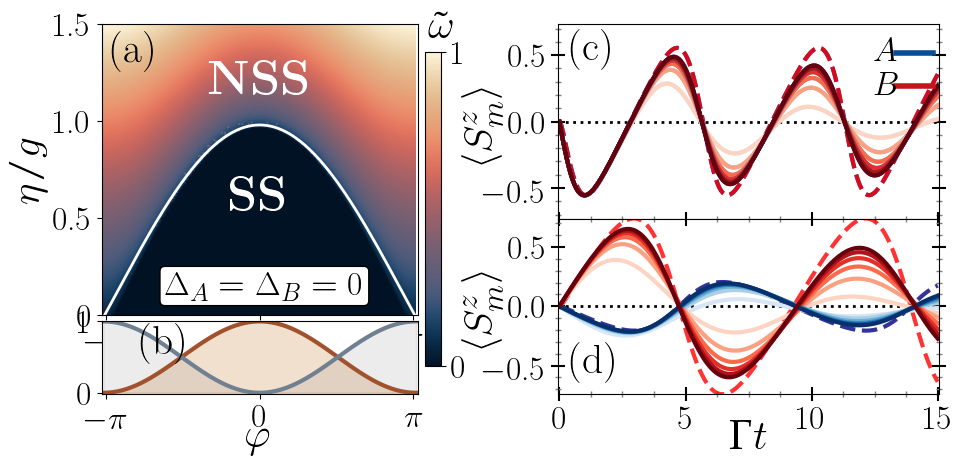

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

# ----------------------
# Constants + data load (unchanged)
kappa = 1.0
g = 0.1 * kappa
Gamma = 4 * g ** 2 / kappa
tim = np.linspace(0, 15 / Gamma, 200)

data1 = np.loadtxt("../simul/fourier_sznodet.txt")
data2 = np.loadtxt("../simul/fourier_szwdet.txt")

φ_vals = np.linspace(-np.pi, np.pi, len(data1))
η_vals = np.linspace(0.0 * g, 1.5 * g, len(data1.T))

x = φ_vals / np.pi
y = η_vals / g

data1 = data1.T
data2 = data2.T

clims1 = (0.0, 1)
clims2 = (0.0, 1.0)

xtick_locs = [-0.98, 0.0, 0.98]
xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

ytick_locs = [0.001, 0.5, 1.0, 1.5]
ytick_labels = [r"$0$", r"$0.5$", r"$1.0$", r"$1.5$"]

# mf data for panels c/d (unchanged)
phi_list = [0, 0, 4 / 5 * np.pi, np.pi]
deltaA_list = [0, 0.01, 0, 0.01]

data1_mf1 = np.loadtxt("../finsize_data/mf_data1s1.txt")
data1_mf2 = np.loadtxt("../finsize_data/mf_data1s2.txt")
data2_mf1 = np.loadtxt("../finsize_data/mf_data2s1.txt")
data2_mf2 = np.loadtxt("../finsize_data/mf_data2s2.txt")
data3_mf1 = np.loadtxt("../finsize_data/mf_data3s1.txt")
data3_mf2 = np.loadtxt("../finsize_data/mf_data3s2.txt")
data4_mf1 = np.loadtxt("../finsize_data/mf_data4s1.txt")
data4_mf2 = np.loadtxt("../finsize_data/mf_data4s2.txt")

mf_data_list = [
    (data1_mf1, data1_mf2),
    (data4_mf1, data4_mf2),
    (data2_mf1, data2_mf2),
    (data3_mf1, data3_mf2),
]


cmap = lipari

# ----------------------
# Top-level GridSpec: 1 row × 2 columns (left block and right block)
fig = plt.figure(figsize=(9*1.2, 4*1.2))

gs_top = gridspec.GridSpec(nrows=1, ncols=2, figure=fig, width_ratios=[1.0, 1.0], wspace=0.20)

# Left nested GridSpec: 2 rows × 1 col with height ratios 0.8 : 0.2 (a above b)
gs_left = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_top[0, 0],
                                           height_ratios=[0.8, 0.2], hspace=0.03)

# Right nested GridSpec: 2 rows × 1 col with equal heights (c above d)
gs_right = gridspec.GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_top[0, 1],
                                            height_ratios=[1, 1], hspace=0.12)

# Create axes from nested specs
ax_a = fig.add_subplot(gs_left[0, 0])   # (a)
ax_b = fig.add_subplot(gs_left[1, 0], sharex=ax_a)  # (b) shares x with a

ax_c = fig.add_subplot(gs_right[0, 0])  # (c)
ax_d = fig.add_subplot(gs_right[1, 0])  # (d)

# ----------------------
# Panel (a): imshow (kept exactly as before)
im_a = ax_a.imshow(
    data1 * 1 / data1.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=cmap,
    vmin=clims1[0],
    vmax=clims1[1],
)

ax_a.set_ylabel(r"$\eta / g$")
# ax_a.set_xlabel(r"$\varphi$")
ax_a.set_xticks(xtick_locs)
ax_a.set_xticklabels("")
ax_a.set_yticks(ytick_locs)
ax_a.set_yticklabels(ytick_labels)

fncx = (0.88 * np.cos(1.08 * x * np.pi / 2.0) + 0.1)
ax_a.plot(x, fncx, color="white", linewidth=2)

ax_a.set_ylim(0.001, 1.5)
ax_a.text(0.03, 0.98, "(a)", transform=ax_a.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")

ax_a.text(
    0.20, 0.05, r"$\mathrm{\Delta}_A=\mathrm{\Delta}_B=0$",
    transform=ax_a.transAxes, fontsize=24, va="bottom", ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15"),
)

ax_a.text(0.0, 0.6, r"$\mathbf{SS}$", fontsize=35, ha="center", va="center", color="white")
ax_a.text(0.0, 1.2, r"$\mathbf{NSS}$", fontsize=35, ha="center", va="center", color="white")

# hide top x tick labels for a
ax_a.set_xticklabels([])

# ----------------------
# Panel (b): weight vs x = φ/π (same coordinate as imshow extent)
w_s2 = np.cos(φ_vals / 2.0) ** 2
w_bar = np.sin(φ_vals / 2.0) ** 2

ax_b.plot(x, w_s2, lw=3, color="sienna")
ax_b.plot(x, w_bar, lw=3, color="slategrey")
ax_b.fill_between(x, 0, w_s2, color='peru', alpha=0.25)
ax_b.fill_between(x, 0, w_bar, color='grey', alpha=0.15)

ax_b.set_xlim(x.min() - 0.01, x.max() + 0.01)
ax_b.set_ylim(-0.01, 1.01)

ax_b.set_xticks(xtick_locs)
ax_b.set_xticklabels(xtick_labels)
ax_b.set_xlabel(r'$\varphi$', labelpad=-10)
# ax_b.yaxis.tick_right()
# ax_b.yaxis.set_label_position("right")

# ax_b.set_xlabel(r"$w^\varphi_{S^2_\text{max}}$", color='sienna', fontsize=22, labelpad=-15)
# ax_b.tick_params(axis='x', colors='sienna')
# ax_b.set_ylabel(r"$w$", labelpad=6)

# ax_b_top = ax_b.twiny()
# ax_b_top.set_xlim(ax_b.get_xlim())
# ax_b_top.set_xlabel(r"$\overline{w}^\varphi$", color='slategrey', fontsize=22, labelpad=-15)
# ax_b_top.tick_params(axis='x', colors='slategrey')

ax_b.text(0.12, 0.98, "(b)", transform=ax_b.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")

# ----------------------
# Attach colorbar to the left column axes (ax_a and ax_b) so both shrink identically
cbar = fig.colorbar(im_a, ax=[ax_a, ax_b], location="right", pad=0.02, shrink=0.85)
title = cbar.ax.set_title(r"$\tilde{\omega}$", pad=10)
title.set_x(1.01)
cbar.set_ticks([0.0, 1])
cbar.set_ticklabels([r"$0$", r"$1$"])

# ----------------------
# Panels (c) and (d): time-series stacked in right column (equal heights)
axes_c_data = [ax_c, ax_d]
dataset_indices = [0, 2]  # c uses index 0, d uses index 2

ymin, ymax = -0.735, 0.735
yticks = np.arange(-0.5, 0.6, 0.5)

for ax_plot, idx in zip(axes_c_data, dataset_indices):
    φ = phi_list[idx]
    ΔA = deltaA_list[idx]
    mf1, mf2 = mf_data_list[idx]

    data = np.load(f"../finsize_data/spin_dynamics_ϕ{φ}_Delta{ΔA}.npz", allow_pickle=True)
    N_values = data["N_values"]
    Jz_A = data["Jz_A"]
    Jz_B = data["Jz_B"]

    # mean-field dashed lines
    ax_plot.plot(tim, mf1, lw=3, color="navy", linestyle="--", alpha=0.8)
    ax_plot.plot(tim, mf2, lw=3, color="red", linestyle="--", alpha=0.8)

    # zero line
    ax_plot.axhline(0, color="black", lw=2, linestyle=":")

    # finite-N curves
    colorlistA = plt.get_cmap("Blues", 1 + len(N_values))
    colorlistB = plt.get_cmap("Reds", 1 + len(N_values))
    for n_idx in range(len(N_values)):
        ax_plot.plot(tim, Jz_A[n_idx] / N_values[n_idx], lw=3, color=colorlistA(1 + n_idx))
        ax_plot.plot(tim, Jz_B[n_idx] / N_values[n_idx], lw=3, color=colorlistB(1 + n_idx))

    ax_plot.set_ylabel(r"$\langle S^z_m \rangle$", labelpad=-15)
    ax_plot.set_ylim(ymin, ymax)
    ax_plot.set_xlim(tim[0] - 1, tim[-1] + 1)
    ax_plot.set_yticks(yticks)

# xticks / labels for bottom time-series (d)
ax_d.set_xticks([0, 5 / Gamma, 10 / Gamma, 15 / Gamma])
ax_d.set_xticklabels([0, 5, 10, 15])
ax_d.set_xlabel(r"$\Gamma t$", labelpad=-10)

# hide top (c) x tick labels
ax_c.set_xticks([0, 5 / Gamma, 10 / Gamma, 15 / Gamma])
ax_c.set_xticklabels([])

# label c and d
ax_c.text(0.03, 0.98, "(c)", transform=ax_c.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")
ax_d.text(0.03, 0.30, "(d)", transform=ax_d.transAxes, fontsize=30, fontweight="bold", va="top", ha="left")

# legend-like colored bars (kept from your snippet) — place to the right without colliding with colorbar
x0, x1 = 0.86, 0.895
y1 = 0.82
y2 = 0.75
color1 = plt.get_cmap("Reds", 10)
color2 = plt.get_cmap("Blues", 10)
l1 = Line2D([x0, x1], [y1, y1], color=color2(8), lw=4, transform=fig.transFigure, figure=fig)
l2 = Line2D([x0, x1], [y2, y2], color=color1(7), lw=4, transform=fig.transFigure, figure=fig)
fig.add_artist(l1)
fig.add_artist(l2)
fig.text(x0 - 0.02, y1, r"$A$", va="center", fontsize=24)
fig.text(x0 - 0.02, y2, r"$B$", va="center", fontsize=24)

# Make ticks point inward for c/d
for ax in [ax_c, ax_d]:
    ax.tick_params(which='both', direction='inout', top=True, right=True, bottom=True, left=True)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', length=10, width=1.5, colors='black')
    ax.tick_params(axis='both', which='minor', length=5, width=1, colors='gray')

dx = 0.0
for ax in [ax_c, ax_d]:
    pos = ax.get_position()
    ax.set_position([pos.x0 - dx, pos.y0, pos.width, pos.height])

# Now recompute positions and snap: set bottom of ax_c == top of ax_d,
# while preserving ax_c's original top coordinate (so ax_c simply shrinks in height).
pos_c = ax_c.get_position()  # [x0, y0, width, height]
pos_d = ax_d.get_position()

y_top_c = pos_c.y0 + pos_c.height
y_top_d = pos_d.y0 + pos_d.height

# New bottom for c should be exactly the top of d
new_y0_c = y_top_d
new_height_c = y_top_c - new_y0_c

# Defensive fallback if new_height would be <= 0 (rare)
if new_height_c <= 0:
    # If there's not enough vertical room, give both axes equal heights and stack them
    total_stack_height = pos_c.height + pos_d.height
    half_height = total_stack_height / 2.0
    # place ax_d at its original bottom with half height, then place ax_c directly above
    ax_d.set_position([pos_d.x0, pos_d.y0, pos_d.width, half_height])
    ax_c.set_position([pos_c.x0, pos_d.y0 + half_height, pos_c.width, half_height])
else:
    # Apply new position for ax_c; leave ax_d unchanged
    ax_c.set_position([pos_c.x0, new_y0_c, pos_c.width, new_height_c])

# Keep c's x tick labels hidden so the seam is clean
ax_c.xaxis.set_ticklabels([])
ax_c.tick_params(axis='x', which='both', length=0)

# Final layout
plt.tight_layout()
# plt.show()
plt.savefig('temp.svg')


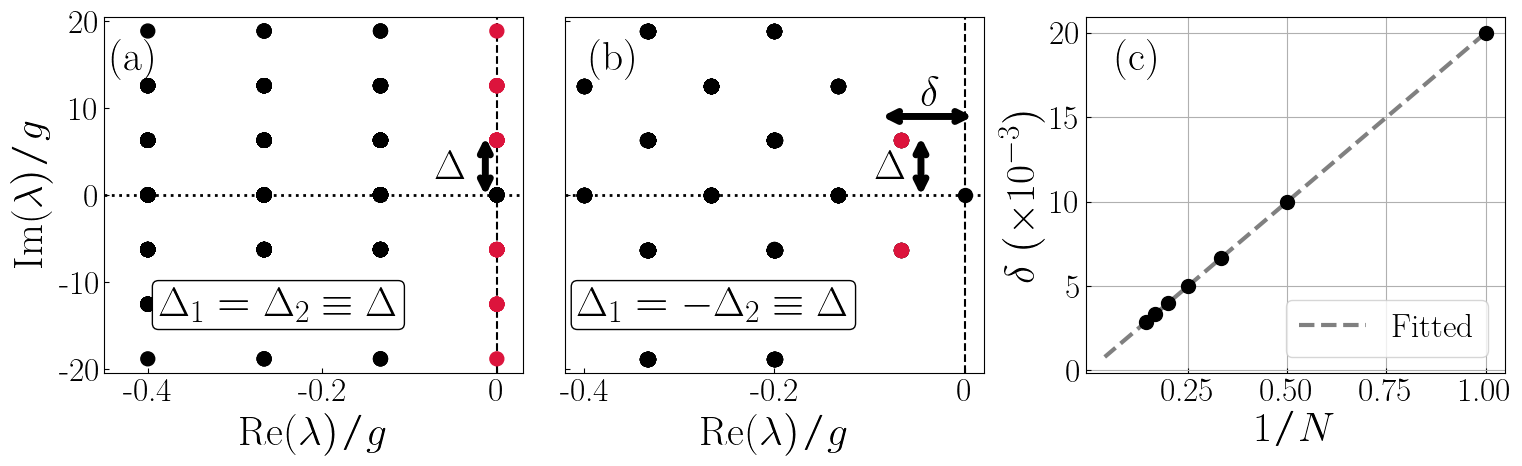

In [ ]:
# — your data placeholders — 
# (we need  real_parts1, imag_parts1, real_parts2, imag_parts2, Ns, gaps, x_fit, fit defined)

real1 = np.loadtxt('../simul/Liouv+Det_real.txt')
imag1 = np.loadtxt('../simul/Liouv+Det_imag.txt')
parts1 = (real1, imag1)

real2 = np.loadtxt('../simul/Liouv-Det_real.txt')
imag2 = np.loadtxt('../simul/Liouv-Det_imag.txt')
parts2 = (real2, imag2)

gaps = np.loadtxt('../simul/gaps.txt')
Ns = np.arange(1,len(gaps)+1)

from scipy.optimize import curve_fit
def inv_model(x, A):
    return A / x

# Initial guess for A
initial_guess = [gaps[0] * Ns[0]]  # ~0.01998

# Perform the curve fitting
popt, pcov = curve_fit(inv_model, Ns, gaps, p0=initial_guess)
A_fit = popt[0]
perr = np.sqrt(np.diag(pcov))[0]
# Generate smooth curve for plotting
x_fit = np.linspace(Ns.min(), 25, 200)
fit = inv_model(x_fit, A_fit)

# thresholds
thr_real = 1e-3
thr_imag = 1e-3

# condition 1: real part < thr_real
mask_real = abs(parts1[0]) < thr_real
# condition 2: imag part > thr_imag
mask_imag = abs(parts1[1]) > thr_imag

# combined mask: both true → coloured red
mask_red = mask_real & mask_imag

colors = np.where(mask_red, 'crimson', 'black')


fig = plt.figure(figsize=(15, 5))

# Left panel
ax0 = fig.add_subplot(1, 3, 1)
ax0.tick_params(direction='in', which='both')
ax0.tick_params(axis='y', labelleft=True)
ax0.scatter(parts1[0], parts1[1], c=colors, s=100, zorder=3)
ax0.set_xlabel(r'Re($\lambda)/g$')
ax0.set_ylabel(r'Im($\lambda)/g$')
ax0.set_xticks([0, -0.02, -0.04], [0, -0.2,-0.4])
ax0.set_yticks([-2, -1,  0, 1, 2], [-20, -10, 0, 10, 20])
ax0.set_xlim(-0.045, 0.003)
ax0.set_ylim(-2.05,2.05)
ax0.axhline(0, color="black", lw=2, linestyle=":")
ax0.axvline(0, color="black", lw=1.5, linestyle="--")
ax0.text(
    0.13, 0.14, r"$\mathrm{\Delta_1}=\mathrm{\Delta_2}\equiv\mathrm{\Delta}$",
    transform=ax0.transAxes,
    fontsize=30,
    color="black",
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)
ax0.annotate(
    '',
    xy      = (0.91, 0.67),     # head
    xytext  = (0.91,  0.49),      # tail
    xycoords= 'axes fraction',
    arrowprops = dict(
        arrowstyle='<->',       # double‐headed
        lw=5
    )
)

# compute midpoint in axes–fraction coordinates
mid_x = (0.78 + 0.78) / 2
mid_y = (0.67 + 0.48) / 2

# place the label just to the right of the arrow’s midpoint
ax0.text(
    mid_x + 0.01, mid_y,        # small x-offset so it doesn’t sit on the line
    r'$\mathrm{\Delta}$',
    transform = ax0.transAxes,
    va        = 'center',
    ha        = 'left',
    fontsize  = 30
)

#ax0.legend(loc="upper right")

# Middle panel (shares y-axis with left)
ax1 = fig.add_subplot(1, 3, 2)
ax1.axhline(0, color="black", lw=2, linestyle=":")
ax1.axvline(0, color="black", lw=1.5, linestyle="--")
ax1.tick_params(direction='in', which='both')
ax1.scatter(parts2[0], parts2[1], color='black', label='Data', s=100)
ax1.scatter(parts2[0][2:13], parts2[1][2:13], color='crimson', s=100)
ax1.set_xlabel(r'Re($\lambda)/g$')
ax1.set_xticks([0, -0.02, -0.04], [0, -0.2,-0.4])
ax1.set_yticks([-2,0,2],[])
# ax1.set_xticks([0,  -1e-2, -2e-2])
# ax1.set_yticks([-3,0,3],[-3,0,3])
# ax1.set_xlim(-2e-2, 1e-4)
ax1.set_ylim(-2.05,2.05)
ax1.text(
    0.03, 0.14, r"$\mathrm{\Delta_1}=-\mathrm{\Delta_2}\equiv\mathrm{\Delta}$",
    transform=ax1.transAxes,
    fontsize=30,
    color="black",
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.15")
)
ax1.annotate(
    '',
    xy      = (0.85, 0.67),     # head
    xytext  = (0.85,  0.49),      # tail
    xycoords= 'axes fraction',
    arrowprops = dict(
        arrowstyle='<->',       # double‐headed
        lw=5
    )
)

# compute midpoint in axes–fraction coordinates
mid_x = 0.73
mid_y = (0.67 + 0.48) / 2

# place the label just to the right of the arrow’s midpoint
ax1.text(
    mid_x + 0.01, mid_y,        # small x-offset so it doesn’t sit on the line
    r'$\mathrm{\Delta}$',
    transform = ax1.transAxes,
    va        = 'center',
    ha        = 'left',
    fontsize  = 30
)


ax1.annotate(
    '',
    xy      = (0.75, 0.72),     # head
    xytext  = (0.98,  0.72),      # tail
    xycoords= 'axes fraction',
    arrowprops = dict(
        arrowstyle='<->',       # double‐headed
        lw=5
    )
)

# compute midpoint in axes–fraction coordinates
mid_x = (0.7 + 0.98) / 2
mid_y = 0.78

# place the label just to the right of the arrow’s midpoint
ax1.text(
    mid_x + 0.01, mid_y,        # small x-offset so it doesn’t sit on the line
    r'$\delta$',
    transform = ax1.transAxes,
    va        = 'center',
    ha        = 'left',
    fontsize  = 30
)




# Right panel: finite‐size scaling
ax2 = fig.add_subplot(1, 3, 3)

ax2.tick_params(direction='in', which='both')
ax2.grid()
ax2.plot(1/x_fit, fit*1e3, linestyle='--', color='grey', label=r'Fitted', lw=3)
ax2.scatter(1/Ns, gaps*1e3, color='black', s=100, zorder=2)
ax2.set_xlabel(r'$1/N$')
ax2.set_ylabel(r'$\delta\; (\times10^{-3})$')
ax2.legend(loc="lower right")

# ax2.set_yscale('log')
ax2.set_yticks([20, 15, 10, 5, 0], [20, 15,  10, 5, 0])
ax2.set_xticks([0.25, 0.5, 0.75, 1])
# labels already match ticks
ax2.tick_params(axis='both', which='major')
fig.tight_layout()
#plt.show()


fig.text(
    0.085,            # x‐coordinate 
    0.89,             # y‐coordinate
    "(a)",
    fontsize=30,
    fontweight="bold",
    va="top"
)
fig.text(
    0.405,            # x‐coordinate 
    0.89,             # y‐coordinate
    "(b)",
    fontsize=30,
    fontweight="bold",
    va="top"
)
fig.text(
    0.755,            # x‐coordinate 
    0.89,             # y‐coordinate
    "(c)",
    fontsize=30,
    fontweight="bold",
    va="top"
)

fig.subplots_adjust(wspace=0.10)
pos2 = ax2.get_position()
ax2.set_position([pos2.x0 + 0.04, pos2.y0, pos2.width, pos2.height])

# plt.savefig("fig4.svg", bbox_inches="tight")
plt.show()

## More ideas for last figure

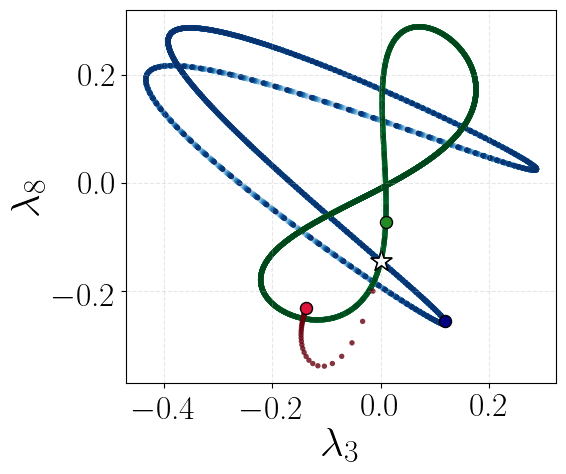

In [ ]:
from matplotlib.cm import get_cmap



initx = 0.0
inity = -0.1443375672974065

# file names
files    = ["../debug/run_1.txt", "../debug/run_2.txt", "../debug/run_3.txt"]
cmaps    = [plt.colormaps.get_cmap("Blues"), plt.colormaps.get_cmap("Greens"), plt.colormaps.get_cmap("Reds_r")]
markers  = ["o", "o", "o"]
sizes    = [15, 15, 15]
edgecols = ["none", "none", "none"]
mark_end = ["navy", "forestgreen", "crimson"]

fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect("equal")
ax.set_xlabel(r"$\lambda_3$")
ax.set_ylabel(r"$\lambda_8$")
ax.grid(True, linestyle="--", alpha=0.3)

for k, fname in enumerate(files):
    data = np.loadtxt(fname, skiprows=1)  # skip header
    t, λ3, λ8 = data[:,0], data[:,1], data[:,2]

    # normalized time for color
    tnorm = (t - t[0]) / (t[-1] - t[0])
    colors = cmaps[k](tnorm)

    # scatter trajectory
    sc = ax.scatter(λ3, λ8,
                    c=colors,
                    s=sizes[k],
                    alpha=0.8,
                    marker=markers[k],
                    edgecolors=edgecols[k])

    # mark start
    ax.scatter(initx, inity,
            marker="*",
            s=240,
            c="white",
            edgecolors="black")
    # mark end
    ax.scatter(λ3[-1], λ8[-1],
            marker="o",
            s=75,
            c=mark_end[k],
            edgecolors="black")
    

plt.tight_layout()
plt.show()

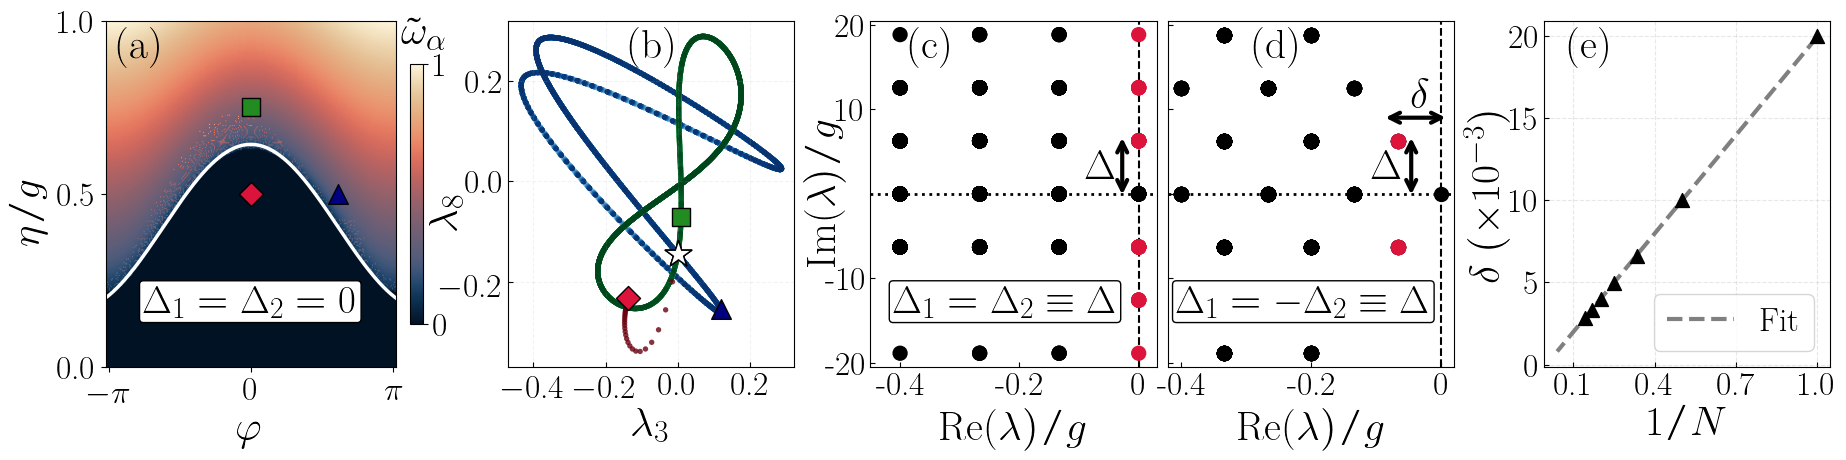

In [262]:
    # —————— Load / define your data ——————————————————————————————
    # Panel (a):

    data1   = np.loadtxt("../debug/fourier_spin1.txt")     # replace with your path
    data1 = data1.T
    φ_vals = np.linspace(-np.pi, np.pi, len(data1))   # replace 200 with your actual length
    η_vals = np.linspace(0, 1.5*g, len(data1))    # match your Julia spacing exactly if known


    # xticks at φ/π = −1,0,1, labeled “–π, 0, π”
    xtick_locs   = [-0.98, 0.0, 0.98]
    xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

    ytick_locs = [0.0, 0.5, 1.0]
    ytick_labels = [r"$0.0$", r"$0.5$", r"$1.0$"]

    def fncx(x):
        return 0.238 * np.cos(0.83 * x * np.pi) + 0.405
    x_func = φ_vals / np.pi


    # Panel (b): your phase‐portrait from the three Julia runs
    files    = ["../debug/run_1.txt", "../debug/run_2.txt", "../debug/run_3.txt"]
    cmaps    = [plt.colormaps.get_cmap("Blues"), plt.colormaps.get_cmap("Greens"), plt.colormaps.get_cmap("Reds_r")]
    markers  = ["o", "o", "o"]
    endmarker = ["^", "s", "D"]
    sizes    = [200, 150, 150]
    edgecols = ["none", "none", "none"]
    mark_end = ["navy", "forestgreen", "crimson"]

    y_pts = [ 0.5, 0.75,  0.5 ]   # in the same units as φ_vals/π on the x‐axis
    x_pts = [  3/5, 0,  0 ]   # in the same units as η_vals/g on the y‐axis


    # Panels (c,d,e): spectral parts & finite‐size‐scaling
    real1 = np.loadtxt('../simul/Liouv+Det_real.txt')
    imag1 = np.loadtxt('../simul/Liouv+Det_imag.txt')
    parts1 = (real1, imag1)

    real2 = np.loadtxt('../simul/Liouv-Det_real.txt')
    imag2 = np.loadtxt('../simul/Liouv-Det_imag.txt')
    parts2 = (real2, imag2)

    gaps = np.loadtxt('../simul/gaps.txt')
    Ns   = np.arange(1, len(gaps) + 1)

    # fit δ(N) = A/N
    from scipy.optimize import curve_fit
    def inv_model(x, A): return A / x

    popt, pcov = curve_fit(inv_model, Ns, gaps, p0=[gaps[0]*Ns[0]])
    A_fit = popt[0]
    x_fit = np.linspace(Ns.min(), 25, 200)
    fit   = inv_model(x_fit, A_fit)

    # thresholds for panel (c)
    thr_real = 1e-3
    thr_imag = 1e-3
    mask_red = (np.abs(parts1[0]) < thr_real) & (np.abs(parts1[1]) > thr_imag)
    colors_c = np.where(mask_red, 'crimson', 'black')

    # —————— 1×5 grid —————————————————————————————————————
    fig = plt.figure(figsize=(22.5, 4.5))
    gs = gridspec.GridSpec(
        nrows=1, ncols=5, figure=fig,
        width_ratios=[1, 0.8, 0.8,0.8,0.8],
        height_ratios=[1],
        wspace=0.2, hspace=0.03
    )

    # Panel a: heatmap
    ax_a = fig.add_subplot(gs[0])
    x = φ_vals / np.pi
    y = η_vals / np.max(η_vals) * (η_vals.max()/η_vals.max())  # or η_vals/g if you prefer
    im = ax_a.imshow(
        data1 / data1.max(),
        extent=(x.min(), x.max(), y.min(), y.max()),
        origin="lower",
        aspect="auto",
        cmap=lipari,
    )
    ax_a.set_xlabel(r"$\varphi$")
    ax_a.set_ylabel(r"$\eta/g$")
    ax_a.set_xticks(xtick_locs)
    ax_a.set_xticklabels(xtick_labels)
    ax_a.set_yticks(ytick_locs)
    ax_a.set_yticklabels(ytick_labels)
    ax_a.plot(x_func, fncx(x_func), color="white", linewidth=2.5)
    ax_a.text(
        0.13, 0.14, r"$\mathrm{\Delta_1}=\mathrm{\Delta_2}=0$",
        transform=ax_a.transAxes,
        fontsize=28,
        color="black",
        va="bottom",
        ha="left",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1")
    )

    for k in range(3):
        ax_a.scatter(
            x_pts[k],
            y_pts[k],
            marker=endmarker[k],
            s=sizes[k],
            c=mark_end[k],
            edgecolors='black',  # optional, for a border
            zorder=5
        )
    # Panel b:
    ax_b = fig.add_subplot(gs[1])
    ax_b.tick_params(direction='in', which='both')
    ax_b.set_yticks([-0.2,0, 0.2])
    ax_b.set_xticks([-0.4,-0.2,0.0,0.2])
    ax_b.set_xlabel(r"$\lambda_3$")
    ax_b.set_ylabel(r"$\lambda_8$", labelpad=-15)
    ax_b.grid(True, linestyle="--", alpha=0.15)
    for k, fname in enumerate(files):
        data = np.loadtxt(fname, skiprows=1)
        t, λ3, λ8 = data[:,0], data[:,1], data[:,2]
        tnorm = (t - t[0])/(t[-1]-t[0])
        ax_b.scatter(λ3, λ8,
                    c=cmaps[k](tnorm),
                    s=15,
                    alpha=0.8,
                    marker=markers[k],
                    edgecolors=edgecols[k])
        ax_b.scatter(λ3[-1], λ8[-1], marker=endmarker[k], s=sizes[k], c=mark_end[k], edgecolors="black",zorder=5)
        ax_b.scatter(initx, inity,
                marker="*",
                s=400,
                c="white",
                edgecolors="black", zorder=5)

    # Panel c
    ax_c = fig.add_subplot(gs[2])
    ax_c.tick_params(direction='in', which='both')
    ax_c.scatter(parts1[0], parts1[1], c=colors_c, marker="o",s=100, zorder=3)
    ax_c.axhline(0, color="black", lw=2, linestyle=":")
    ax_c.axvline(0, color="black", lw=1.5, linestyle="--")
    ax_c.set_xlim(-0.045, 0.003)
    ax_c.set_ylim(-2.05, 2.05)
    ax_c.set_xlabel(r"Re($\lambda)/g$")
    ax_c.set_ylabel(r"Im($\lambda)/g$", labelpad=-15)
    ax_c.set_xticks([0, -0.02, -0.04], [0, -0.2,-0.4])
    ax_c.set_yticks([-2, -1,   1, 2], [-20, -10,  10, 20])

    ax_c.text(
        0.08, 0.14, r"$\mathrm{\Delta_1}=\mathrm{\Delta_2}\equiv\mathrm{\Delta}$",
        transform=ax_c.transAxes,
        fontsize=28,
        color="black",
        va="bottom",
        ha="left",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1")
    )
    ax_c.annotate(
        '',
        xy      = (0.88, 0.67),     # head
        xytext  = (0.88,  0.49),      # tail
        xycoords= 'axes fraction',
        arrowprops = dict(
            arrowstyle='<->',       # double‐headed
            lw=3
        )
    )

    # compute midpoint in axes–fraction coordinates
    mid_x = (0.78 + 0.78) / 2
    mid_y = (0.67 + 0.48) / 2

    # place the label just to the right of the arrow’s midpoint
    ax_c.text(
        mid_x - 0.03, mid_y,        # small x-offset so it doesn’t sit on the line
        r'$\mathrm{\Delta}$',
        transform = ax_c.transAxes,
        va        = 'center',
        ha        = 'left',
        fontsize  = 30
    )




    # Panel d
    ax_d = fig.add_subplot(gs[3])
    ax_d.tick_params(direction='in', which='both')
    ax_d.scatter(parts2[0], parts2[1], color='black', marker="o",s=100, label='Data', zorder=2)
    ax_d.scatter(parts2[0][2:13], parts2[1][2:13], color='crimson', marker="o",s=100, zorder=3)
    ax_d.axhline(0, color="black", lw=2, linestyle=":")
    ax_d.axvline(0, color="black", lw=1.5, linestyle="--")
    ax_d.set_xlabel(r"Re($\lambda)/g$")
    ax_d.set_xticks([0, -0.02, -0.04], [0, -0.2,-0.4])
    ax_d.set_yticks([-2, -1,  0, 1, 2],[])
    ax_d.set_ylim(-2.05,2.05)
    ax_d.text(
        0.03, 0.14, r"$\mathrm{\Delta_1}=-\mathrm{\Delta_2}\equiv\mathrm{\Delta}$",
        transform=ax_d.transAxes,
        fontsize=28,
        color="black",
        va="bottom",
        ha="left",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1")
    )
    ax_d.annotate(
        '',
        xy      = (0.85, 0.67),     # head
        xytext  = (0.85,  0.49),      # tail
        xycoords= 'axes fraction',
        arrowprops = dict(
            arrowstyle='<->',       # double‐headed
            lw=3
        )
    )

    mid_x = 0.73
    mid_y = (0.67 + 0.48) / 2

    ax_d.text(
        mid_x - 0.02, mid_y,        # small x-offset so it doesn’t sit on the line
        r'$\mathrm{\Delta}$',
        transform = ax_d.transAxes,
        va        = 'center',
        ha        = 'left',
        fontsize  = 30
    )
    ax_d.annotate(
        '',
        xy      = (0.75, 0.72),     # head
        xytext  = (0.98,  0.72),      # tail
        xycoords= 'axes fraction',
        arrowprops = dict(
            arrowstyle='<->',       # double‐headed
            lw=3
        )
    )
    # compute midpoint in axes–fraction coordinates
    mid_x = (0.7 + 0.98) / 2
    mid_y = 0.78

    ax_d.text(
        mid_x + 0.01, mid_y,        # small x-offset so it doesn’t sit on the line
        r'$\delta$',
        transform = ax_d.transAxes,
        va        = 'center',
        ha        = 'left',
        fontsize  = 30
    )
    # Panel e
    ax_e = fig.add_subplot(gs[4])
    ax_e.tick_params(direction='in', which='both')
    ax_e.grid(True, linestyle="--", alpha=0.3)
    ax_e.plot(1/x_fit, fit*1e3, linestyle='--', linewidth=3, label='Fit', color="grey")
    ax_e.scatter(1/Ns, gaps*1e3, color='black', marker="^", s=100, zorder=2)
    ax_e.set_xlabel(r"$1/N$")
    ax_e.set_ylabel(r"$\delta\;(\times10^{-3})$", labelpad=-1)
    ax_e.set_yticks([20, 15, 10, 5, 0], [20, 15,  10, 5, 0])
    ax_e.set_xticks([0.1, 0.4, 0.7, 1])
    ax_e.legend(loc="lower right")

    # Panel labels
    fig.text(0.13, 0.8, "(a)", fontsize=30, fontweight="bold")
    fig.text(0.3575, 0.8, "(b)", fontsize=30, fontweight="bold")
    fig.text(0.482, 0.8, "(c)", fontsize=30, fontweight="bold")
    fig.text(0.635, 0.8, "(d)", fontsize=30, fontweight="bold")
    fig.text(0.775, 0.8, "(e)", fontsize=30, fontweight="bold")

    cbar = fig.colorbar(
        im,
        ax=[ax_a],
        location="right",
        pad=0.04,
        shrink=0.75
    )
    title = cbar.ax.set_title(r"$\tilde{\omega}_\alpha$", pad=15)
    title.set_x(1.01)  
    cbar.set_ticks([0.0, 1])
    cbar.set_ticklabels([r"$0$", r"$1$"])


    gap_ab = 0.05   # between panels a & b
    gap_cd = 0.005   # between panels c & d
    gap_de = 0.04
    # shift (b) next to (a)
    pos_a = ax_a.get_position()
    pos_b = ax_b.get_position()
    new_x0_b = pos_a.x0 + pos_a.width + gap_ab
    ax_b.set_position([new_x0_b, pos_b.y0, pos_b.width, pos_b.height])

    # shift (d) next to (c)
    pos_c = ax_c.get_position()
    pos_d = ax_d.get_position()
    new_x0_d = pos_c.x0 + pos_c.width + gap_cd
    ax_d.set_position([new_x0_d, pos_d.y0, pos_d.width, pos_d.height])


    pos_d = ax_d.get_position()
    pos_e = ax_e.get_position()
    new_x0_e = pos_d.x0 + pos_d.width + gap_de
    ax_e.set_position([new_x0_e, pos_e.y0, pos_e.width, pos_e.height])

    ax_a.yaxis.set_label_coords(-0.2, 0.45)   # x‐fraction, y‐fraction
    ax_b.yaxis.set_label_coords(-0.15, 0.45)

    # plt.show()
    plt.savefig("fig3.svg", bbox_inches="tight")


## SUPMAT FIGURES

C:\Users\admin\AppData\Local\Temp\ipykernel_30096\4237432777.py:62: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 3 Axes> than <Figure size 1200x600 with 3 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(


Text(0.25, 0.25, '$\\eta/g=0.4$')

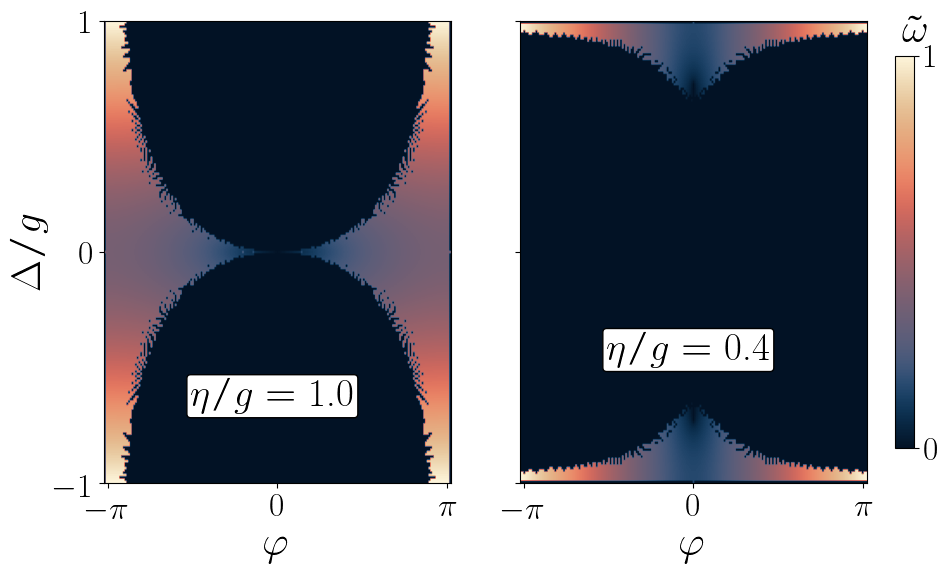

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

kappa = 1.0
g = 0.1*kappa
Gamma = 4*g**2/kappa



# Load the two “vars_sz1” files exactly as in Julia
data1 = np.loadtxt("../simul/fourier_detvsphi1.txt")   
data2 = np.loadtxt("../simul/fourier_detvsphi04.txt")

φ_vals = np.linspace(-np.pi, np.pi, len(data1)) 
Delta_vals = np.linspace(-1*g, 1*g, len(data1.T))    


x = φ_vals / np.pi               
y =  Delta_vals / g                   

data1 = data1.T


# xticks at φ/π = −1,0,1, labeled “–π, 0, π”
xtick_locs   = [-0.98, 0.0, 0.98]
xtick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

ytick_locs = [-1, 0, 1.0]
ytick_labels = [r"$-1$", r"$0$", r"$1$"]


# Choose “lipari” colormap (replace with your actual custom cmap if needed)
# If you defined a custom Lipari colormap elsewhere, import or recreate it here.
# For demonstration I'll just pick “viridis”:
cmap = lipari

# -------

fig, ax = plt.subplots(1,2,figsize=(12,6))



im_a = ax[0].imshow(
    data1 * 1 / data1.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims1[0],
    vmax=clims1[1]
)

ax[0].set_ylabel(r"$ \mathrm{\Delta} / g$")
ax[0].set_xlabel(r"$\varphi$")
ax[0].set_xticks(xtick_locs)
ax[0].set_xticklabels(xtick_labels)
ax[0].set_yticks(ytick_locs)
ax[0].set_yticklabels(ytick_labels)


cbar = fig.colorbar(
    im_b,
    ax=[ax[0], ax[1]],
    location="right",
    pad=0.03,
    shrink=0.85
)
title = cbar.ax.set_title(r"$\tilde{\omega}$", pad=10)
title.set_x(1.01)  
cbar.set_ticks([0.0, 1])
cbar.set_ticklabels([r"$0$", r"$1$"])


im_b = ax[1].imshow(
    data2 * 1 / data2.max(),
    extent=(x.min(), x.max(), y.min(), y.max()),
    origin="lower",
    aspect="auto",
    cmap=lipari,
    vmin=clims1[0],
    vmax=clims1[1]
)

ax[1].set_xlabel(r"$\varphi$")
ax[1].set_xticks(xtick_locs)
ax[1].set_xticklabels(xtick_labels)
ax[1].set_yticks([-1, 0, 1], [])

ax[0].text(
    0.25, 0.15, r"$\eta/g=1.0$",
    transform=ax[0].transAxes,
    fontsize=28,
    color="black",
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1")
)

ax[1].text(
    0.25, 0.25, r"$\eta/g=0.4$",
    transform=ax[1].transAxes,
    fontsize=28,
    color="black",
    va="bottom",
    ha="left",
    bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1")
)

#plt.show()
plt.savefig("SM_fig2.pdf", bbox_inches="tight")

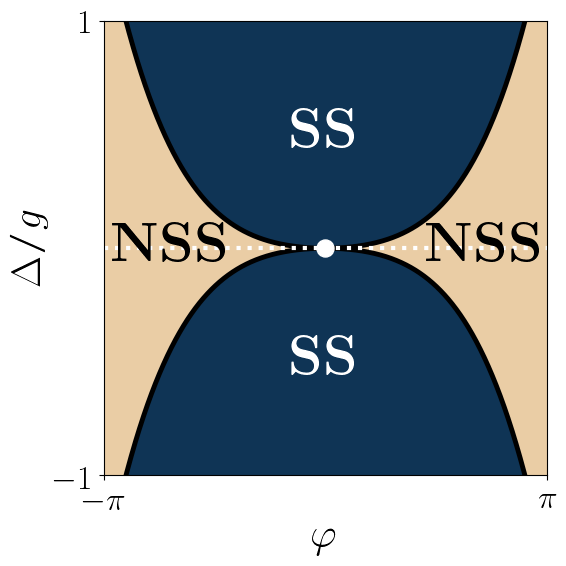

In [30]:

x = np.linspace(-1, 1, 1000)  # Higher resolution for smoother vector shapes
a = 1
b = 0.42

fnx1 = lambda x: a * x**4 + b * x**2
fnx2 = lambda x: -a * x**4 - b * x**2

y_upper = fnx1(x)
y_lower = fnx2(x)

fig, ax = plt.subplots(figsize=(6, 6))

# Fill between the curves (SS region)
ax.fill_between(x, y_lower, y_upper, color=lipari(0.90), zorder=1)

# Fill above and below for NSS regions
ax.fill_between(x, y_upper, 1.0, color=lipari(0.10), zorder=0)
ax.fill_between(x, -1.0, y_lower, color=lipari(0.10), zorder=0)

# Boundary curves
ax.plot(x, y_upper, color="black", linewidth=3.5)
ax.plot(x, y_lower, color="black", linewidth=3.5)

# Extras
ax.scatter([0], [0], marker="o", s=150, c="white", zorder=5)
ax.axhline(0, color="white", lw=3, linestyle=":")
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\mathrm{\Delta}/g$")
ax.set_xticks([-1,  1], [r"$-\pi$", r"$\pi$"])
ax.set_yticks([-1,  1])
ax.text(0, 0.5, r"$\mathbf{SS}$", fontsize=40, ha="center", va="center", color="white")
ax.text(0, -0.5, r"$\mathbf{SS}$", fontsize=40, ha="center", va="center", color="white")
ax.text(-0.7, 0.0, r"$\mathbf{NSS}$", fontsize=40, ha="center", va="center", color="black")
ax.text(0.72, 0.0, r"$\mathbf{NSS}$", fontsize=40, ha="center", va="center", color="black")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.tight_layout()
#plt.savefig("poster_fig.svg")

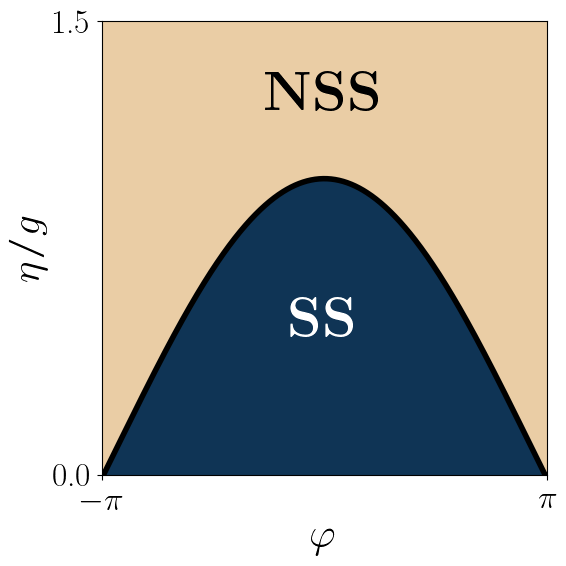

In [29]:
x = np.linspace(-1, 1, 1000)
fncx = 0.88 * np.cos(1.08 * x * np.pi / 2.0) + 0.1

fig, ax = plt.subplots(figsize=(6, 6))

# Fill below boundary (SS region)
ax.fill_between(x, 0, fncx, color=lipari(0.10), zorder=1)

# Fill above boundary (NSS region)
ax.fill_between(x, fncx, 1.5, color=lipari(0.90), zorder=0)

# Boundary curve
ax.plot(x, fncx, color="black", linewidth=4)

# Extras
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1.5)
ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\eta/g$")
ax.set_xticks([-1, 1], [r"$-\pi$",r"$\pi$"])
ax.set_yticks([0, 1.5])
ax.text(0, 0.5, r"$\mathbf{SS}$", fontsize=40, ha="center", va="center", color="white")
ax.text(0, 1.25, r"$\mathbf{NSS}$", fontsize=40, ha="center", va="center", color="black")
plt.tight_layout()
#plt.savefig("poster_fig2.svg")  # Fully vector-based

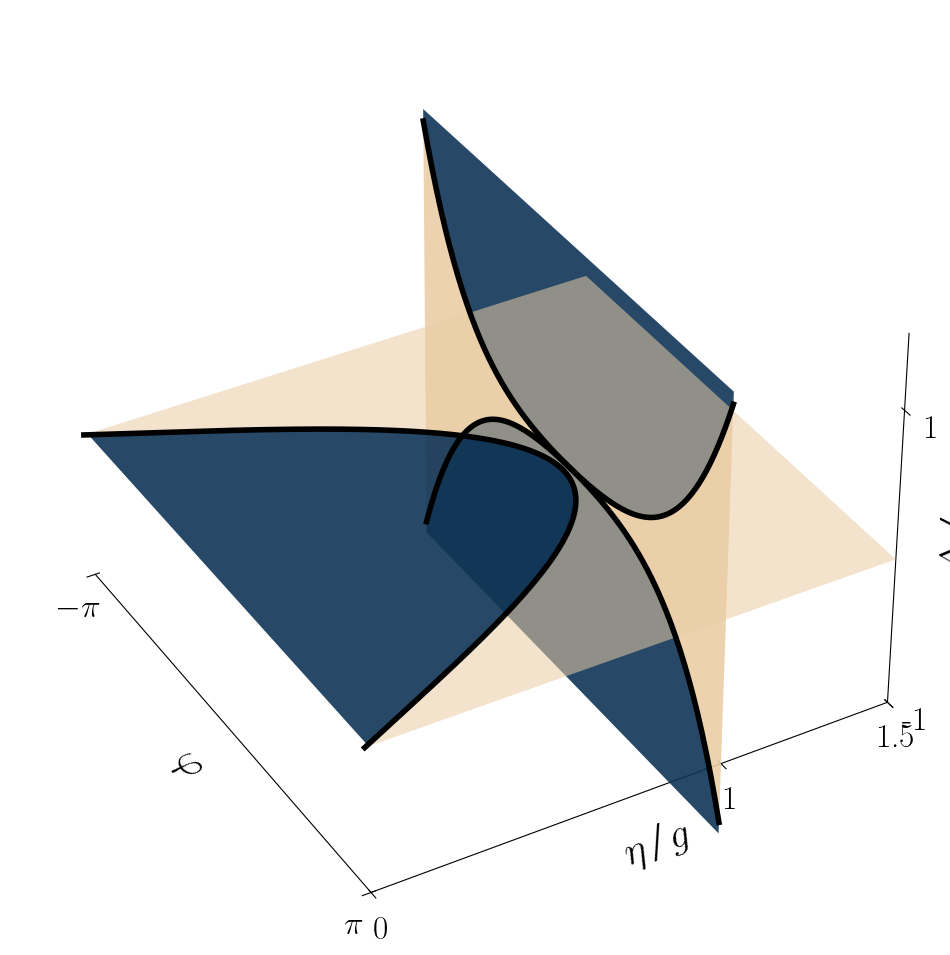

In [ ]:

# Data
x      = np.linspace(-1, 1, 200)
a, b   = 1.0, 0.42
fn_up  = a*x**4 + b*x**2
fn_low = -a*x**4 - b*x**2
fn_cos = 0.88 * np.cos(1.08 * x * np.pi/2) + 0.1

# Set up 3D axes
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111, projection='3d')

for plane in (ax.xaxis, ax.yaxis, ax.zaxis):
    plane.pane.set_facecolor((1, 1, 1, 0))   # fully transparent
    plane.pane.set_edgecolor((1, 1, 1, 0))   # hide the black edges

# — Boundary curves —
ax.plot(x, np.ones_like(x), fn_up,   color='black', lw=4, zorder=10)
ax.plot(x, np.ones_like(x), fn_low,  color='black', lw=4, zorder=10)
ax.plot(x, fn_cos,np.zeros_like(x), color='black', lw=4, zorder=10)



# — Grey fills (as before) — 
#  XY: region above fn_cos
y_max = 1.5
verts_xy_grey = (
    list(zip(x, fn_cos,np.zeros_like(x))) +
    list(zip(x[::-1], np.full_like(x, y_max), np.zeros_like(x)))
)
poly_xy_grey = Poly3DCollection([verts_xy_grey],
                                facecolor=lipari(0.90), alpha=0.55, edgecolor=None)
ax.add_collection3d(poly_xy_grey)

# — White fills (complementary) —
#  XY: region below fn_cos
verts_xy_white = (
    list(zip(x, np.zeros_like(x),np.zeros_like(x))) +
    list(zip(x[::-1], fn_cos[::-1],np.zeros_like(x)))
)
poly_xy_white = Poly3DCollection([verts_xy_white],
                                 facecolor=lipari(0.10), alpha=0.90, edgecolor=None, zorder=15)
ax.add_collection3d(poly_xy_white)


z_min, z_max = -1.5, 1.5

# — band between fn_low and fn_up (SS region) in dark shade —
verts_xz_dark = (
    list(zip(x, np.ones_like(x), fn_up)) +
    list(zip(x[::-1], np.ones_like(x), fn_low[::-1]))
)
poly_xz_dark = Poly3DCollection([verts_xz_dark],
                                facecolor=lipari(0.90),  # your “dark” shade
                                alpha=0.90,
                                edgecolor=None, zorder=10) 


# — regions outside that band (NSS regions) in light shade —
# above fn_up
verts_xz_light1 = (
    list(zip(x, np.ones_like(x), fn_up)) +
    list(zip(x[::-1], np.ones_like(x), np.full_like(x, z_max)))
)
# below fn_low
verts_xz_light2 = (
    list(zip(x, np.ones_like(x), fn_low)) +
    list(zip(x[::-1], np.ones_like(x), np.full_like(x, z_min)))
)

poly_xz_light = Poly3DCollection([verts_xz_light1, verts_xz_light2],
                                 facecolor=lipari(0.10),  # your “light” shade
                                 alpha=0.9,
                                 edgecolor=None, zorder=15)
ax.add_collection3d(poly_xz_light, zdir=None)
ax.add_collection3d(poly_xz_dark, zdir=None)
# Remove gridlines
ax.grid(False)

# Axes limits & ticks
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1.5)
ax.set_zlim(-1, 1.5)
ax.set_xticks([-1, 1], [r"$-\pi$", r"$\pi$"])
ax.set_yticks([0, 1, 1.5], [0, r"$1$", r"$1.5$"])
ax.set_zticks([-1, 1], [-1, 1])

ax.set_xlabel(r"$\varphi$")
ax.set_ylabel(r"$\eta/g$")
ax.set_zlabel(r"$\mathrm{\Delta}/g$")
      # render on top of everything else)
# Adjust view if you like
ax.view_init(elev=35, azim=-30)

#plt.show()

plt.savefig("poster_figalt.svg", bbox_inches="tight")

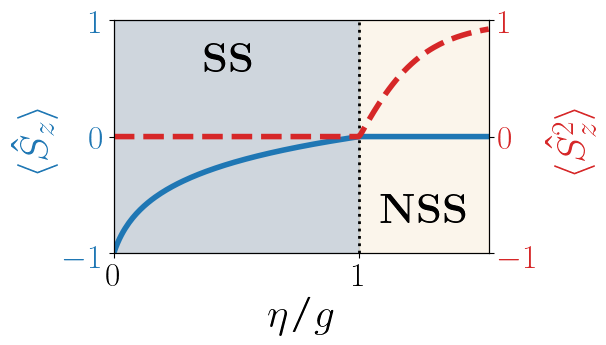

In [ ]:
# Generate x values
x = np.linspace(0.05, 1.5, 200)  # Avoid log(0) by starting at a small number > 0

sz = np.where(x < 1, -np.log(x) / np.log(0.05), 0)  # scales from -1 to 0

x_c = 1      # Critical point
a = 4        # Sharpness of transition
sz2 = np.where(x >= 1, np.tanh(a * np.log(x / x_c)), 0)  # scales from 0 to 1




# Create plot
fig, ax1 = plt.subplots(figsize=(6.4, 3.8))

# Plot sz on the left y-axis
color1 = 'tab:blue'
ax1.set_xlabel(r'$\eta/g$')
ax1.set_ylabel(r'$\langle\hat{S}_z\rangle$', color=color1)
ax1.plot(x, sz, color=color1, lw=4)
ax1.axvline(x=1, color="black", linestyle=":", lw=2)
ax1.set_xticks([0.05, 1],[0,1])
ax1.set_yticks([-1,0,1])
ax1.set_xlim(0.05,1.5)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(-1, 1)  # unified scale

ax1.text(0.5, 0.65, r"$\mathbf{SS}$", ha='center', va='center', fontsize=30)
ax1.text(1.25, -0.65, r"$\mathbf{NSS}$", fontsize=30, ha="center", va="center", color="black")
ax1.axvspan(0.05, 1, color=lipari(0.1), alpha=0.2, label='x < 1')  # choose your color

# Fill region x ≥ 1 (right region)
ax1.axvspan(1, 1.5, color=lipari(0.95), alpha=0.3, label='x ≥ 1')  # choose your color

# Create a second y-axis for sz2
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel(r'$\langle\hat{S_z^2}\rangle$', color=color2)
ax2.plot(x, sz2, color=color2, linestyle='--', lw=4)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_yticks([-1,0,1])
ax2.set_ylim(-1, 1)  # unified scale
# Title and layout
fig.tight_layout()
#plt.show()
#plt.savefig("poster_phaset.svg")

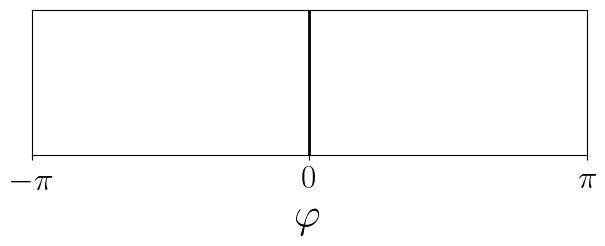

In [307]:
x = np.linspace(-1.05, 1.05, 200)  # Avoid log(0) by starting at a small number > 0

# Create plot
fig, ax = plt.subplots(figsize=(6.4, 2.8))

ax.set_xticks([-1,0, 1],[r"$-\pi$", 0, r"$\pi$"])
ax.set_yticks([])
ax.set_xlabel(r"$\varphi$")
ax.axvline(x=0, color="black", linestyle="-", lw=2)
plt.tight_layout()
plt.savefig("temp.svg")


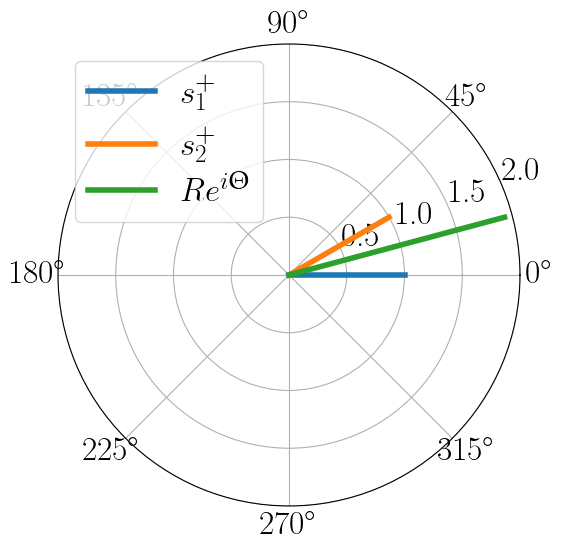

In [326]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the two spins
r1 = 1               # amplitude of s1^+
theta1 = 0   # phase of s1^+ 
r2 = 1               # amplitude of s2^+
theta2 = 0   # phase of s2^+ 
phi = np.pi/6       # relative phase shift

# Compute the rotated second phasor
theta2_rot = theta2 + phi

# Sum the two phasors to get the resultant
x1, y1 = r1 * np.cos(theta1), r1 * np.sin(theta1)
x2, y2 = r2 * np.cos(theta2_rot), r2 * np.sin(theta2_rot)
xr, yr = x1 + x2, y1 + y2
R = np.hypot(xr, yr)
Theta = np.arctan2(yr, xr)

# Create polar plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(6, 6))

# Plot s1^+
ax.plot([theta1, theta1], [0, r1], lw=4, label=r'$s_1^+$')
# Plot rotated s2^+
ax.plot([theta2_rot, theta2_rot], [0, r2], lw=4, label=r'$s_2^+$')
# Plot resultant R e^{iΘ}
ax.plot([Theta, Theta], [0, R], lw=4, label=r'$R e^{i\Theta}$')

# Annotate

ax.set_rlim(0, 2)
plt.legend()
plt.show()

## Strong symmetry



### New attempt figure 3

In [914]:
def plot_panel_a(ax, data1,cmap=lipari):
    g=0.1
    φ_vals = np.linspace(-np.pi, np.pi, len(data1))   
    η_vals = np.linspace(0, 1.5*g, len(data1))  
    x = φ_vals / np.pi
    y = η_vals / g
    hm = ax.imshow((data1 / data1.max()).T,
                   extent=(x.min(), x.max(), y.min(), y.max()),
                   origin="lower", aspect="auto", cmap="bone_r")
    ax.set_xlabel(r"$\varphi$", labelpad=-10)
    ax.set_ylabel(r"$\eta/g$", labelpad=-2)
    ax.set_xticks([-0.98, 0.0, 0.98])
    ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_yticklabels([r"$0.0$", r"$0.5$", r"$1.0$"])

    ax.set_aspect("equal")
    # def fncx(x_): return 0.238 * np.cos(0.83 * x_ * np.pi) + 0.405
    # ax.plot(x, fncx(x), color="white", linewidth=2.5)
    ax.text(0.17, 0.14, r"$\mathrm{\Delta}_A=\mathrm{\Delta}_B=0$",
            transform=ax.transAxes, fontsize=24, color="black",
            va="bottom", ha="left",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1"))
    return hm


def plot_a_vs_b_heatmap(ax, data, phase, text_pos=(0.1, 0.14), show_xlabel=True, add_cbar=True, **imshow_kwargs):
    a_vals = np.unique(data[:, 0])
    b_vals = np.unique(data[:, 1])
    normalized_amp = data[:, 2].reshape(len(a_vals), len(b_vals))

    hm = ax.imshow(
        normalized_amp.T,
        extent=(a_vals.min(), a_vals.max(), b_vals.min(), b_vals.max()),
        origin="lower",
        aspect="equal",
        cmap="bone_r",
        **imshow_kwargs
    )
    if show_xlabel:
        ax.set_xlabel(r'$a$', labelpad=-10)
    else:
        ax.xaxis.set_ticklabels([])
    ax.set_ylabel(r'$b$', labelpad=-15)
    ax.set_yticks([-1,0,1])
    ax.set_xticks([-1, 0, 1])
    if add_cbar:
        cbar = plt.colorbar(hm, ax=ax)
        cbar.set_label(r'$\tilde{\omega}_{N_{B}}$')

    ax.text(text_pos[0], text_pos[1], fr"$\varphi={phase}$",
        transform=ax.transAxes, fontsize=24, color="black",
        va="bottom", ha="left", bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.1"))
    return hm



def plot_a_b_eta_contour(ax, data):        
    # Extract basic arrays
    a_vals = data['a_vals']
    b_vals = data['b_vals']
    eta_ratios = data['eta_ratios']

    # Reconstruct data_slices dictionary
    data_slices = {}
    for η_ratio in eta_ratios:
        key_name = f"data_slice_{η_ratio}"
        data_slices[η_ratio] = data[key_name]

    # Create meshgrid
    A, B = np.meshgrid(a_vals, b_vals, indexing='ij')

    # Get the last η ratio
    last_eta = eta_ratios[-1]

    threshold = 0.005
    # Plot each η ratio slice
    for i, η_ratio in enumerate(eta_ratios):
        normalized_amp = data_slices[η_ratio]
        mask = normalized_amp >= threshold
        
        # Convert mask to float and set transparent areas to NaN
        mask_plot = mask.astype(float)
        mask_plot[mask_plot == 0] = np.nan
        
        contour_color = [*plt.cm.colors.to_rgba('sandybrown')]  
        contour_color[3] = 0.5  # Alpha
        
        # Plot contour with explicit handling of transparent areas
        cs = ax.contourf(
            A, B, mask_plot,
            levels=[0.5, 1.5],
            colors=[contour_color],
            zdir='z',
            offset=η_ratio,
            extend='neither',  # Don't extend beyond the defined levels
            alpha=2*η_ratio/3
        )
        
        
        # Only add scatter points for the last η slice
        if η_ratio == last_eta:
            sqrt2 = np.sqrt(2)
            points = [
                (1/sqrt2, 1/sqrt2, 'darkorange'),
                (-1/sqrt2, -1/sqrt2, 'darkorange'),
                (1/sqrt2, -1/sqrt2, 'grey'),
                (-1/sqrt2, 1/sqrt2, 'grey'),
                (0, 0, 'darkorange')
            ]
            for a, b, color in points:
                ax.scatter(a, b, η_ratio, color=color, s=50, alpha=0.75)
            
            # Draw circle
            theta = np.linspace(0, 2*np.pi, 100)
            a_circle = 0.995 * np.cos(theta)
            b_circle = 0.995 * np.sin(theta)
            z_circle = np.full_like(theta, η_ratio)
            ax.plot(a_circle, b_circle, z_circle, color='grey', linestyle='-', linewidth=3, alpha=0.25)

        if η_ratio == eta_ratios[0]:
            theta = np.linspace(0, 2*np.pi, 200)
            a_circle = 0.995 * np.cos(theta)
            b_circle = 0.995 * np.sin(theta)
            z_circle = np.full_like(theta, η_ratio)
            ax.plot(a_circle, b_circle, z_circle, color='black', linestyle='-', linewidth=3, alpha=0.25, zorder=1000)


        if η_ratio == 0.5:
            s = 1.0                       # corner coordinate
            square_a = np.array([ s, -s, -s,  s,  s])
            square_b = np.array([ s,  s, -s, -s,  s])
            square_z = np.full_like(square_a, η_ratio)
            ax.plot(square_a, square_b, square_z,
            color='black', linewidth=2, linestyle='-', alpha=0.5,
            zorder=60)

    # Axis labels and settings
    ax.set_xlabel(r'$a$')
    ax.set_ylabel(r'$b$')
    ax.set_zlabel(r'$\eta/g$')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    
    ax.set_zticks([0,0.5,1.0])

    ax.grid(False)
    ax.view_init(elev=20, azim=-45)
    
    # Make the background panes transparent
    ax.xaxis.pane.set_alpha(0)
    ax.yaxis.pane.set_alpha(0)
    ax.zaxis.pane.set_alpha(0)
    ax.xaxis.pane.set_facecolor('white')
    ax.yaxis.pane.set_facecolor('white')
    ax.zaxis.pane.set_facecolor('white')

    # Set limits to match your data range
    ax.set_xlim(np.min(a_vals), np.max(a_vals))
    ax.set_ylim(np.min(b_vals), np.max(b_vals))
    ax.set_zlim(0,1)
    
    return ax


In [915]:
# Load data from files

# Panel A data
data1   = np.loadtxt("../debug/fourier_spin1.txt")   

# Panel B data
data_ab = np.load("../debug/ab_eta_slices.npz", allow_pickle=True)
# Extract basic arrays
a_vals = data_ab['a_vals']
b_vals = data_ab['b_vals']
eta_ratios = data_ab['eta_ratios']

data_slices = {}
for η_ratio in eta_ratios:
    key_name = f"data_slice_{η_ratio}"
    data_slices[η_ratio] = data_ab[key_name]


# last panel (c,d)
data_phi0 = np.loadtxt("../debug/a_vs_b_eta=0.5_phi=0.txt", comments="#")
data_phi_pi2 = np.loadtxt("../debug/a_vs_b_eta=0.5_phi=pi_2.txt", comments="#")

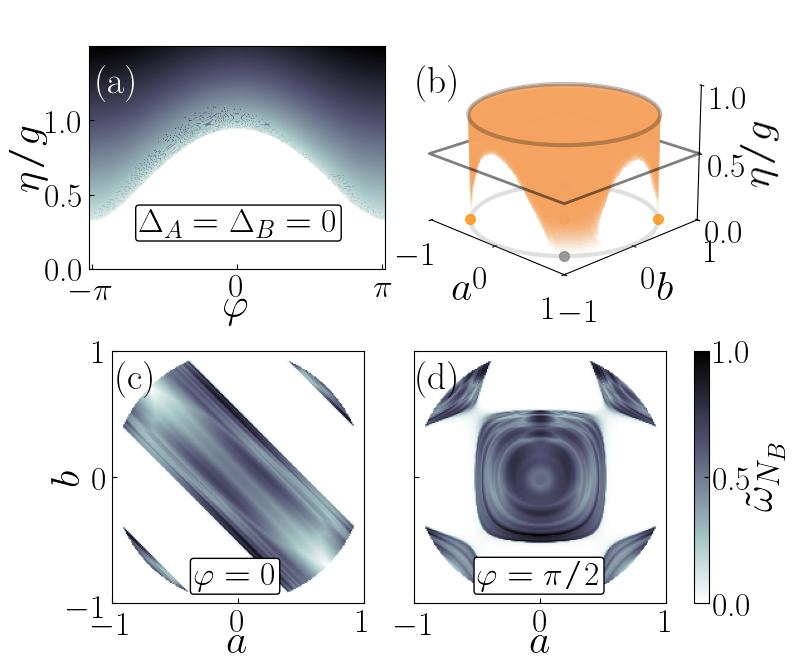

<Figure size 640x480 with 0 Axes>

In [917]:
from matplotlib import gridspec
# --- figure: 2 rows x 2 columns ---
fig = plt.figure(figsize=(8, 8))

# Create main grid: 2 rows, 1 column for top and bottom sections
gs_outer = gridspec.GridSpec(nrows=2, ncols=1, figure=fig,
                           height_ratios=[1.35, 1.0],  
                           hspace=0.08)

# Top row: 2 columns for panels a and b
gs_top = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_outer[0],
                                        wspace=0.09)

# Bottom row: 3 columns (c , d, colorbar ) 
gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs_outer[1],
                                           width_ratios=[1, 1, 0.05],  # Narrow middle column for colorbar
                                           wspace=0.02)  # Reduced space between bottom panels

# top-left (a)
ax_a = fig.add_subplot(gs_top[0, 0])
im_a = plot_panel_a(ax_a, data1)   # (a)

# top-right (b) as a 3D axes 
ax_b = fig.add_subplot(gs_top[0, 1], projection='3d')
plot_a_b_eta_contour(ax_b, data_ab)  # (b)

# bottom-left (c)
ax_c = fig.add_subplot(gs_bottom[0, 0])
hm_c = plot_a_vs_b_heatmap(ax_c, data_phi0, phase="0",
                           text_pos=(0.325, 0.05),
                           show_xlabel=True, add_cbar=False)
ax_c.set_aspect('equal')
ax_c.set_yticks([-1, 0, 1])


# Colorbar axis (middle of bottom row) - using dedicated cax like in your complex example
ax_cbar = fig.add_subplot(gs_bottom[0, 2])

# bottom-right (d) heatmap
ax_d = fig.add_subplot(gs_bottom[0, 1])
hm_d = plot_a_vs_b_heatmap(ax_d, data_phi_pi2, phase=r"\pi/2",
                           text_pos=(0.250, 0.05),
                           show_xlabel=True, add_cbar=False)
ax_d.set_aspect('equal')

# Remove y-label on (d)
ax_d.set_ylabel('')
ax_d.set_yticklabels('')

# Common styling
for ax in fig.get_axes():
    ax.tick_params(direction="in")

# Create colorbar in the dedicated space using cax parameter (like in your complex example)
cbar = fig.colorbar(hm_c, cax=ax_cbar)
cbar.set_label(r'$\tilde{\omega}_{N_{B}}$', labelpad=-5)
#cbar.ax.set_title(r'$\tilde{\omega}_{N_{B}}$',pad=18)

# Panel labels - adjust positions for the new layout
# Since we now have a 3-column bottom row, the x-positions need adjustment
fig.text(0.135, 0.75, "(a)", fontsize=27, fontweight="bold", color="white")
fig.text(0.535, 0.75, "(b)", fontsize=27, fontweight="bold")

# For bottom row: c is in first column (left), d is in third column (right)
# The middle column is narrow (0.05 width ratio), so positions are roughly:
# c: ~0.06, d: ~0.53 (adjusted for the colorbar space)
fig.text(0.16, 0.38, "(c)", fontsize=27, fontweight="bold")
fig.text(0.535, 0.38, "(d)", fontsize=27, fontweight="bold")

plt.show()

plt.savefig("fig3.svg")

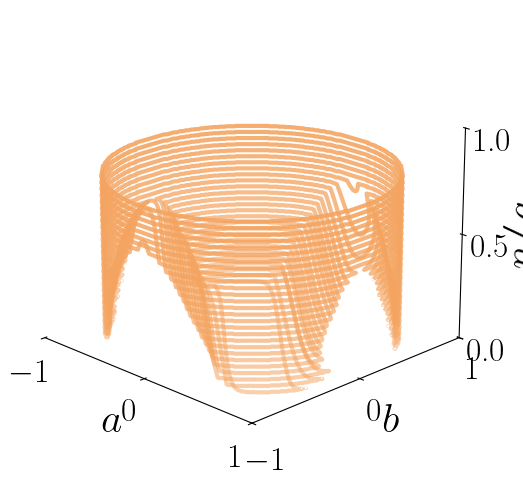

In [901]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

n = 3  # plot every nth eta value

for eta_ratio in eta_ratios[::n]:
    Z = data_slices[eta_ratio]
    A, B = np.meshgrid(a_vals, b_vals, indexing='ij')
    ax.contour(A, B, Z, levels=[0.001], offset=eta_ratio, colors='sandybrown', linewidths=3, alpha=eta_ratio/2+0.5)


ax.set_xlabel(r'$a$')
ax.set_ylabel(r'$b$')
ax.set_zlabel(r'$\eta/g$')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

ax.set_zticks([0,0.5,1.0])

ax.grid(False)
ax.view_init(elev=20, azim=-45)

# Make the background panes transparent
ax.xaxis.pane.set_alpha(0)
ax.yaxis.pane.set_alpha(0)
ax.zaxis.pane.set_alpha(0)
ax.xaxis.pane.set_facecolor('white')
ax.yaxis.pane.set_facecolor('white')
ax.zaxis.pane.set_facecolor('white')

# Set limits to match your data range
ax.set_xlim(np.min(a_vals), np.max(a_vals))
ax.set_ylim(np.min(b_vals), np.max(b_vals))
ax.set_zlim(0,1)

plt.show()

Modified figure 1 with strong symmetry schematic

In [ ]:
from matplotlib.colors import Normalize

# Create figure and 3D axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# Parametrize cones
theta = np.linspace(0, 2*np.pi, 200)
z_top = np.linspace(0, 1, 200)
Zt, Th = np.meshgrid(z_top, theta)
Xt = Zt * np.cos(Th)
Yt = Zt * np.sin(Th)

z_bot = np.linspace(0, -1, 200)
Zb, Thb = np.meshgrid(z_bot, theta)
Xb = -Zb * np.cos(Thb)
Yb = -Zb * np.sin(Thb)

# Set up a normalizer over the full |z| range so both cones share the same mapping
norm = Normalize(vmin=-1, vmax=1)

# Grab the two colormaps
cmap_top = imola.reversed()
cmap_bot = cerrado.reversed()

# Compute facecolors
facecolors_top = cmap_top(norm(Zt))
facecolors_bot = cmap_bot(norm(Zb))

phi = np.linspace(0, 2*np.pi, 400)
xc, yc, zc = np.cos(phi), np.sin(phi), np.zeros_like(phi)
ax.plot(xc, yc, zc,
        linewidth=3,     # tweak as you like
        color='k',       # or any color
        solid_capstyle='round', linestyle='--')

# Plot top cone
ax.plot_surface(
    Xt, Yt, Zt,
    facecolors=facecolors_top,
    rstride=4, cstride=4,      
    shade=False, edgecolor='none', alpha=0.30, antialiased=True
)

# Plot bottom cone
ax.plot_surface(
    Xb, Yb, Zb,
    facecolors=facecolors_bot,
    rstride=4, cstride=4,      
    shade=False, edgecolor='none', alpha=0.5,antialiased=True
)

# Tidy up
ax.set_box_aspect([1, 1, 1])
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.axis('off')
ax.view_init(elev=10, azim=20)
#plt.tight_layout()

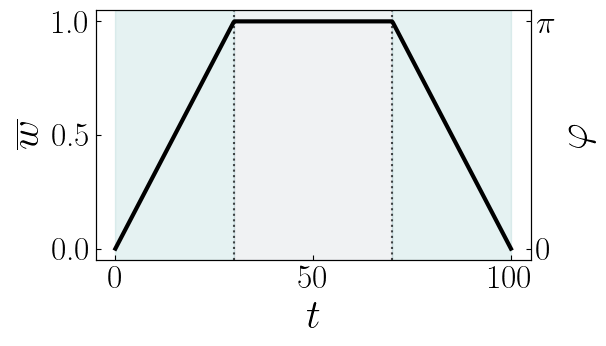

In [57]:
fig, ax1 = plt.subplots(figsize=(6.4, 3.8))

color1 = 'tab:blue'
color2 = 'tab:red'

tspan = np.linspace(0, 100, 400)

# Linear growth, plateau, and decay
y1 = np.zeros_like(tspan)

for i, t in enumerate(tspan):
    if t <= 30:  # Linear growth from 0 to 1
        y1[i] = t / 30
    elif t <= 70:  # Plateau at 1 for 20 time units
        y1[i] = 1
    else:  # Linear decay from 1 to 0
        y1[i] = 1 - (t - 70) / 30

y2 = np.zeros_like(tspan)
for i, t in enumerate(tspan):
    if t <= 30:  # Linear growth from 0 to π
        y2[i] = np.pi * t / 30
    elif t <= 70:  # Plateau at π for 20 time units
        y2[i] = np.pi
    else:  # Linear decay from π to 0
        y2[i] = np.pi * (1 - (t - 70) / 30)

# Left axis
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$\overline{w}$')
ax1.plot(tspan, y1, color='black', lw=3)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x')

# Right axis
ax2 = ax1.twinx()
ax2.set_ylabel(r'$\varphi$')
ax2.plot(tspan, y2, color='grey', lw=0)
ax2.tick_params(axis='y', direction='in')
ax2.set_yticks([0, np.pi], [ r"$0$", r"$\pi$"])

# Place all ticks inwards
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")


# Add vertical dotted lines at region boundaries
ax1.axvline(x=30, color='black', linestyle=':', alpha=0.7)
ax1.axvline(x=70, color='black', linestyle=':', alpha=0.7)

# Add background shading for three regions
ax1.axvspan(0, 30, alpha=0.1, color='teal')
ax1.axvspan(30, 70, alpha=0.1, color='slategrey')
ax1.axvspan(70, 100, alpha=0.1, color='teal')


fig.tight_layout()
plt.show()

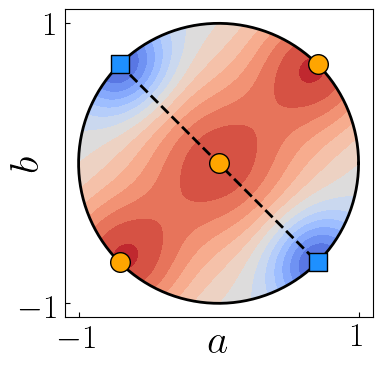

In [216]:
# ---- user-specified points ----
bright_positions = [(0.0, 0.0), (-1.0/np.sqrt(2), -1.0/np.sqrt(2)), (1.0/np.sqrt(2), 1.0/np.sqrt(2))]
dark_positions   = [(-1.0/np.sqrt(2), 1.0/np.sqrt(2)), (1.0/np.sqrt(2), -1.0/np.sqrt(2))]

# field parameters 
A_bright = +1.0   # (peaks)
A_dark   = -1.0   # (valleys)
sigma = 0.35      # Gaussian width

# ---- computational grid ----
xmin, xmax, nx = -1.1, 1.1, 800
ymin, ymax, ny = -1.1, 1.1, 800
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)

# ---- build scalar potential V(x,y) ----
V = np.zeros_like(X)
for bx, by in bright_positions:
    if bx == 0.0 and by == 0.0:            # central node
        V += (A_bright) * np.exp(-((X - bx)**2 + (Y - by)**2) / (3 * sigma**2))
    else:
        V += A_bright * np.exp(-((X - bx)**2 + (Y - by)**2) / (2 * sigma**2))

for dx, dy in dark_positions:
    V += A_dark * np.exp(-((X - dx)**2 + (Y - dy)**2) / (1* sigma**2))

V_masked = np.ma.masked_where(R > 1.0, V)  # mask everything outside the circle

fig, ax = plt.subplots(figsize=(4, 4))
levels = 13
cf = ax.contourf(X, Y, V_masked, levels=levels, cmap='coolwarm')

# mark the bright and dark points
bx_list, by_list = zip(*bright_positions)
dx_list, dy_list = zip(*dark_positions)
ax.scatter(bx_list, by_list, s=200, color='orange', marker='o',  edgecolor='k', zorder=5)
ax.scatter(dx_list, dy_list, s=150, color='dodgerblue',marker='s', edgecolor='k', zorder=5)

# plot the circle boundary in black
ax.plot(np.cos(np.linspace(0, 2*np.pi, 400)), np.sin(np.linspace(0, 2*np.pi, 400)),
        color='black', linestyle='-', linewidth=2, zorder=1)
# plot line connecting dark points through origin
ax.plot([-1.0/np.sqrt(2), 1.0/np.sqrt(2)], [1.0/np.sqrt(2), -1.0/np.sqrt(2)],
        color='black', linestyle='--', linewidth=2, zorder=1)

ax.set_xlabel(r'$a$', labelpad=-20)
ax.set_xticks([-1,1])
ax.set_ylabel(r'$b$', labelpad=-20)
ax.set_yticks([-1,1])
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect('equal', adjustable='box')
# ax.legend(loc='upper right')

ax.tick_params(direction='in', which='both')

#ax.axis('off')
# show or save
# plt.tight_layout()
# plt.show()
plt.savefig("fig1_dark_bright.svg")

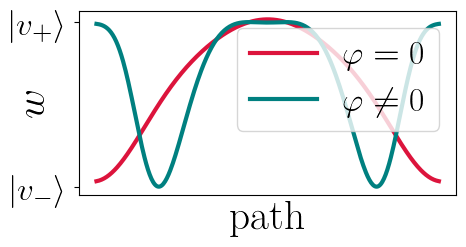

In [209]:
import numpy as np
import matplotlib.pyplot as plt

# ---- user-specified points ----
bright_positions = [(0.0, 0.0),
                    (-1.0/np.sqrt(2), -1.0/np.sqrt(2)),
                    (1.0/np.sqrt(2), 1.0/np.sqrt(2))]
dark_positions   = [(-1.0/np.sqrt(2), 1.0/np.sqrt(2)),
                    (1.0/np.sqrt(2), -1.0/np.sqrt(2))]

# ---- field parameters ----
A_bright = +1.0   # peaks
A_dark   = -1.0   # valleys
sigma = 0.35

# ---- function to compute scalar potential ----
def V_value(xp, yp):
    V = np.zeros_like(xp, dtype=float)
    for bx, by in bright_positions:
        denom = 3 * sigma**2 if (bx == 0.0 and by == 0.0) else 2 * sigma**2
        V += A_bright * np.exp(-((xp - bx)**2 + (yp - by)**2) / denom)
    for dx, dy in dark_positions:
        denom = 1 * sigma**2
        V += A_dark * np.exp(-((xp - dx)**2 + (yp - dy)**2) / denom)
    return V

# ---- define straight line path between dark points ----
p0 = np.array(dark_positions[0])   # start (-1/sqrt2, +1/sqrt2)
p1 = np.array(dark_positions[1])   # end   (1/sqrt2, -1/sqrt2)
Ns = 400
t = np.linspace(0, 1, Ns)
path = np.outer(1 - t, p0) + np.outer(t, p1)
px, py = path[:, 0], path[:, 1]

# ---- compute potential along path ----
V_path = V_value(px, py)

# ---- plot ----
plt.figure(figsize=(5, 2.8))
plt.plot(t, V_path, color='crimson', linewidth=3.0, label=r'$\varphi=0$')
plt.plot(t, -1*np.cos(-1*V_path*np.pi-0*np.pi/2), color='teal', linewidth=3.0, label=r'$\varphi\neq0$')
plt.xlabel(r'path')
plt.xticks([])
plt.ylabel(r'$w$', labelpad=-30)
plt.yticks([-1,1], [r'$|v_-\rangle$', r'$|v_+\rangle$'])
plt.legend(loc='upper right')
plt.tight_layout()
#plt.show()
plt.savefig("fig1_phicut.svg")
